# Synthetic data generation

In [1]:
import warnings
warnings.filterwarnings(action='ignore', message="numpy.dtype size changed")

In [2]:
import pandas as pd

In [3]:
from synthesized.core import BasicSynthesizer

Instructions for updating:
Use the retry module or similar alternatives.


## Load transactions

In [4]:
data = pd.read_csv('../data/transactions.csv')
data.head(10)

,Unnamed: 0,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,mean_income
0,0,695247,2378,1993-01-01,1,2.0,700.0,700.0,NaN,NaN,NaN,[ 11271.53754941]
1,1,695250,2378,1993-01-22,1,2.0,7268.0,7968.0,NaN,NaN,NaN,[ 11271.53754941]
2,2,695266,2378,1993-01-23,1,2.0,14440.0,22408.0,NaN,NaN,NaN,[ 11271.53754941]
3,3,695262,2378,1993-01-24,1,2.0,49752.0,72160.0,NaN,NaN,NaN,[ 11271.53754941]
4,4,695265,2378,1993-01-26,1,2.0,21899.0,94059.0,NaN,NaN,NaN,[ 11271.53754941]
5,5,695560,2378,1993-01-31,0,3.0,34700.0,59453.7,NaN,NaN,NaN,[ 11271.53754941]
6,6,3608592,2378,1993-01-31,1,NaN,94.7,94153.7,2,NaN,NaN,[ 11271.53754941]
7,7,695272,2378,1993-02-05,1,2.0,30192.0,89645.7,NaN,NaN,NaN,[ 11271.53754941]
8,8,695340,2378,1993-02-07,0,0.0,9612.0,80033.7,4,EF,1222903.0,[ 11271.53754941]
9,9,695270,2378,1993-02-11,1,2.0,31038.0,111071.7,NaN,NaN,NaN,[ 11271.53754941]


## Clean dataset

* Leave target columns only (so far: type, operation, amount)
* Filter NaN values
* Convert columns to appropriate type

In [5]:
data = data[['type', 'operation', 'amount']]
data = data.dropna()
data = data[data['type'] != 'VYBER']
data['type'] = data['type'].astype(dtype='int')
data['type'] = data['type'].astype(dtype='category')
data['operation'] = data['operation'].astype(dtype='int')
data['operation'] = data['operation'].astype(dtype='category')
data['amount'] = data['amount'].astype(dtype='float32')
data.head(10)

,type,operation,amount
0,1,2,700.0
1,1,2,7268.0
2,1,2,14440.0
3,1,2,49752.0
4,1,2,21899.0
5,0,3,34700.0
7,1,2,30192.0
8,0,0,9612.0
9,1,2,31038.0
10,0,3,25200.0


## Train model and synthesized data

In [6]:
with BasicSynthesizer(
    dtypes=data.dtypes,
    encoding='variational', encoding_size=32, encoder=(32,), decoder=(32,)
) as synthesizer:
    synthesizer.learn(data=data, verbose=True)
    synthesized = synthesizer.synthesize(n=10000)

1: 1.76e+08
2: 1.83e+08
3: 7.13e+07
4: 7.48e+07
5: 1.72e+08
6: 9.68e+07
7: 1.72e+08
8: 1.06e+08
9: 1.40e+08
10: 2.39e+08
11: 2.20e+08
12: 1.16e+08
13: 1.30e+08
14: 1.50e+08
15: 7.31e+07
16: 1.24e+08
17: 1.55e+08
18: 1.41e+08
19: 8.33e+07
20: 1.26e+08
21: 1.11e+08
22: 1.45e+08
23: 1.92e+08
24: 9.87e+07
25: 1.50e+08
26: 1.38e+08
27: 7.85e+07
28: 1.45e+08
29: 1.15e+08
30: 1.51e+08
31: 2.27e+08
32: 2.03e+08
33: 1.82e+08
34: 1.42e+08
35: 1.19e+08
36: 1.11e+08
37: 1.85e+08
38: 1.21e+08
39: 1.37e+08
40: 1.58e+08
41: 8.12e+07
42: 1.32e+08
43: 2.31e+08
44: 9.73e+07
45: 1.44e+08
46: 1.18e+08
47: 1.75e+08
48: 2.72e+08
49: 9.33e+07
50: 1.63e+08
51: 2.08e+08
52: 1.96e+08
53: 1.46e+08
54: 1.29e+08
55: 1.65e+08
56: 1.32e+08
57: 2.12e+08
58: 2.40e+08
59: 6.68e+07
60: 1.76e+08
61: 6.39e+07
62: 1.64e+08
63: 1.89e+08
64: 1.74e+08
65: 9.48e+07
66: 6.34e+07
67: 1.09e+08
68: 9.15e+07
69: 2.41e+08
70: 1.89e+08
71: 1.76e+08
72: 2.96e+08
73: 1.28e+08
74: 2.18e+08
75: 1.30e+08
76: 1.13e+08
77: 8.25e+07
78: 1.58

639: 1.99e+08
640: 1.30e+08
641: 1.48e+08
642: 1.54e+08
643: 2.53e+08
644: 2.49e+08
645: 1.96e+08
646: 1.16e+08
647: 2.91e+08
648: 1.76e+08
649: 1.51e+08
650: 1.59e+08
651: 7.42e+07
652: 1.29e+08
653: 1.85e+08
654: 1.06e+08
655: 1.52e+08
656: 1.96e+08
657: 5.90e+07
658: 1.53e+08
659: 1.29e+08
660: 1.33e+08
661: 1.45e+08
662: 2.63e+08
663: 1.32e+08
664: 1.01e+08
665: 9.91e+07
666: 9.99e+07
667: 1.12e+08
668: 1.52e+08
669: 8.89e+07
670: 2.59e+08
671: 1.31e+08
672: 8.74e+07
673: 1.33e+08
674: 1.25e+08
675: 2.07e+08
676: 7.13e+07
677: 1.20e+08
678: 9.65e+07
679: 5.74e+07
680: 1.53e+08
681: 7.15e+07
682: 2.33e+08
683: 1.39e+08
684: 1.26e+08
685: 1.61e+08
686: 1.46e+08
687: 1.80e+08
688: 1.55e+08
689: 2.14e+08
690: 1.23e+08
691: 1.28e+08
692: 7.98e+07
693: 2.03e+08
694: 4.89e+07
695: 9.86e+07
696: 1.76e+08
697: 6.18e+07
698: 1.91e+08
699: 1.37e+08
700: 1.58e+08
701: 8.27e+07
702: 1.94e+08
703: 2.16e+08
704: 1.70e+08
705: 1.72e+08
706: 1.65e+08
707: 1.95e+08
708: 1.81e+08
709: 1.31e+08
710: 1

1217: 1.64e+08
1218: 1.31e+08
1219: 1.46e+08
1220: 1.62e+08
1221: 1.14e+08
1222: 1.71e+08
1223: 1.12e+08
1224: 1.20e+08
1225: 9.06e+07
1226: 1.26e+08
1227: 1.15e+08
1228: 1.51e+08
1229: 7.19e+07
1230: 7.42e+07
1231: 1.77e+08
1232: 2.00e+08
1233: 1.60e+08
1234: 8.92e+07
1235: 1.12e+08
1236: 1.69e+08
1237: 1.58e+08
1238: 1.64e+08
1239: 2.55e+08
1240: 2.33e+08
1241: 8.18e+07
1242: 9.10e+07
1243: 2.68e+08
1244: 1.77e+08
1245: 2.30e+08
1246: 1.69e+08
1247: 1.09e+08
1248: 1.54e+08
1249: 1.29e+08
1250: 1.01e+08
1251: 2.09e+08
1252: 1.48e+08
1253: 1.26e+08
1254: 1.41e+08
1255: 1.11e+08
1256: 1.00e+08
1257: 3.04e+08
1258: 2.07e+08
1259: 1.48e+08
1260: 1.55e+08
1261: 2.49e+08
1262: 9.22e+07
1263: 1.28e+08
1264: 1.30e+08
1265: 1.25e+08
1266: 1.72e+08
1267: 2.09e+08
1268: 1.38e+08
1269: 1.11e+08
1270: 1.26e+08
1271: 2.16e+08
1272: 1.23e+08
1273: 1.21e+08
1274: 1.65e+08
1275: 1.23e+08
1276: 1.18e+08
1277: 1.91e+08
1278: 1.40e+08
1279: 1.13e+08
1280: 8.05e+07
1281: 2.52e+08
1282: 1.77e+08
1283: 2.22

1777: 1.26e+08
1778: 1.77e+08
1779: 1.96e+08
1780: 1.62e+08
1781: 1.57e+08
1782: 2.46e+08
1783: 8.06e+07
1784: 1.92e+08
1785: 8.36e+07
1786: 2.42e+08
1787: 2.28e+08
1788: 1.51e+08
1789: 1.33e+08
1790: 9.84e+07
1791: 2.10e+08
1792: 1.15e+08
1793: 1.26e+08
1794: 1.77e+08
1795: 1.86e+08
1796: 1.64e+08
1797: 1.38e+08
1798: 1.06e+08
1799: 2.20e+08
1800: 1.11e+08
1801: 1.32e+08
1802: 1.18e+08
1803: 1.74e+08
1804: 1.07e+08
1805: 1.34e+08
1806: 1.61e+08
1807: 3.36e+08
1808: 6.98e+07
1809: 4.06e+07
1810: 8.73e+07
1811: 2.02e+08
1812: 1.03e+08
1813: 1.39e+08
1814: 8.48e+07
1815: 2.44e+08
1816: 1.29e+08
1817: 2.34e+08
1818: 1.73e+08
1819: 7.49e+07
1820: 2.05e+08
1821: 1.14e+08
1822: 9.41e+07
1823: 1.27e+08
1824: 1.59e+08
1825: 4.25e+07
1826: 1.32e+08
1827: 1.18e+08
1828: 1.56e+08
1829: 1.16e+08
1830: 1.23e+08
1831: 2.12e+08
1832: 2.09e+08
1833: 6.25e+07
1834: 2.15e+08
1835: 1.12e+08
1836: 1.35e+08
1837: 1.82e+08
1838: 2.32e+08
1839: 1.46e+08
1840: 1.34e+08
1841: 2.10e+08
1842: 9.36e+07
1843: 1.29

2390: 1.39e+08
2391: 1.24e+08
2392: 6.41e+07
2393: 9.52e+07
2394: 9.62e+07
2395: 2.13e+08
2396: 1.79e+08
2397: 8.15e+07
2398: 1.91e+08
2399: 1.76e+08
2400: 9.72e+07
2401: 1.74e+08
2402: 3.70e+07
2403: 9.25e+07
2404: 1.81e+08
2405: 2.18e+08
2406: 1.35e+08
2407: 1.61e+08
2408: 2.10e+08
2409: 1.64e+08
2410: 9.31e+07
2411: 1.61e+08
2412: 1.27e+08
2413: 1.62e+08
2414: 2.35e+08
2415: 1.68e+08
2416: 1.63e+08
2417: 1.73e+08
2418: 1.65e+08
2419: 9.14e+07
2420: 2.90e+08
2421: 1.37e+08
2422: 5.55e+07
2423: 1.47e+08
2424: 1.50e+08
2425: 1.39e+08
2426: 1.85e+08
2427: 1.25e+08
2428: 1.10e+08
2429: 1.70e+08
2430: 1.46e+08
2431: 9.72e+07
2432: 1.69e+08
2433: 2.32e+08
2434: 2.15e+08
2435: 9.73e+07
2436: 1.57e+08
2437: 1.29e+08
2438: 1.85e+08
2439: 1.11e+08
2440: 1.59e+08
2441: 1.09e+08
2442: 9.87e+07
2443: 2.10e+08
2444: 1.45e+08
2445: 1.58e+08
2446: 6.17e+07
2447: 1.18e+08
2448: 1.47e+08
2449: 8.66e+07
2450: 9.42e+07
2451: 1.62e+08
2452: 1.95e+08
2453: 1.83e+08
2454: 1.56e+08
2455: 7.52e+07
2456: 1.16

3017: 8.19e+07
3018: 8.83e+07
3019: 2.22e+08
3020: 1.25e+08
3021: 1.43e+08
3022: 2.16e+08
3023: 1.56e+08
3024: 1.30e+08
3025: 1.11e+08
3026: 1.62e+08
3027: 1.27e+08
3028: 1.47e+08
3029: 1.52e+08
3030: 2.08e+08
3031: 1.60e+08
3032: 1.97e+08
3033: 1.92e+08
3034: 1.26e+08
3035: 1.00e+08
3036: 1.53e+08
3037: 1.16e+08
3038: 1.80e+08
3039: 2.03e+08
3040: 1.14e+08
3041: 9.81e+07
3042: 9.65e+07
3043: 1.52e+08
3044: 1.35e+08
3045: 1.73e+08
3046: 8.87e+07
3047: 2.35e+08
3048: 1.36e+08
3049: 1.22e+08
3050: 2.82e+08
3051: 1.37e+08
3052: 7.43e+07
3053: 8.94e+07
3054: 1.68e+08
3055: 1.91e+08
3056: 1.59e+08
3057: 1.79e+08
3058: 9.51e+07
3059: 1.63e+08
3060: 8.28e+07
3061: 1.32e+08
3062: 1.06e+08
3063: 9.05e+07
3064: 7.61e+07
3065: 1.55e+08
3066: 1.54e+08
3067: 2.05e+08
3068: 2.46e+08
3069: 1.15e+08
3070: 1.30e+08
3071: 1.45e+08
3072: 1.36e+08
3073: 1.48e+08
3074: 1.98e+08
3075: 1.81e+08
3076: 9.36e+07
3077: 2.71e+08
3078: 1.50e+08
3079: 1.09e+08
3080: 2.03e+08
3081: 1.04e+08
3082: 1.37e+08
3083: 1.16

3594: 8.12e+07
3595: 1.31e+08
3596: 1.19e+08
3597: 1.61e+08
3598: 2.65e+08
3599: 7.49e+07
3600: 9.90e+07
3601: 1.43e+08
3602: 1.23e+08
3603: 1.53e+08
3604: 1.71e+08
3605: 2.34e+08
3606: 1.85e+08
3607: 1.17e+08
3608: 2.21e+08
3609: 1.59e+08
3610: 1.59e+08
3611: 2.85e+08
3612: 1.06e+08
3613: 1.08e+08
3614: 2.73e+08
3615: 1.30e+08
3616: 1.07e+08
3617: 1.83e+08
3618: 9.62e+07
3619: 1.25e+08
3620: 1.35e+08
3621: 1.49e+08
3622: 2.34e+08
3623: 1.01e+08
3624: 1.93e+08
3625: 1.78e+08
3626: 1.89e+08
3627: 1.54e+08
3628: 1.34e+08
3629: 1.17e+08
3630: 1.49e+08
3631: 1.74e+08
3632: 1.70e+08
3633: 8.00e+07
3634: 2.08e+08
3635: 1.73e+08
3636: 1.56e+08
3637: 1.10e+08
3638: 1.32e+08
3639: 1.68e+08
3640: 1.51e+08
3641: 1.89e+08
3642: 1.69e+08
3643: 3.65e+08
3644: 6.36e+07
3645: 1.17e+08
3646: 1.46e+08
3647: 7.20e+07
3648: 1.60e+08
3649: 2.33e+08
3650: 1.68e+08
3651: 1.98e+08
3652: 7.73e+07
3653: 8.89e+07
3654: 1.21e+08
3655: 1.17e+08
3656: 9.60e+07
3657: 1.28e+08
3658: 1.76e+08
3659: 1.12e+08
3660: 6.26

4176: 4.70e+07
4177: 1.27e+08
4178: 1.96e+08
4179: 2.03e+08
4180: 1.07e+08
4181: 1.94e+08
4182: 1.45e+08
4183: 1.48e+08
4184: 2.84e+08
4185: 1.31e+08
4186: 1.19e+08
4187: 1.46e+08
4188: 1.86e+08
4189: 2.11e+08
4190: 1.54e+08
4191: 5.41e+07
4192: 1.32e+08
4193: 1.25e+08
4194: 2.05e+08
4195: 1.92e+08
4196: 1.79e+08
4197: 1.69e+08
4198: 2.31e+08
4199: 1.65e+08
4200: 1.84e+08
4201: 1.68e+08
4202: 1.87e+08
4203: 1.51e+08
4204: 2.07e+08
4205: 1.34e+08
4206: 1.48e+08
4207: 1.10e+08
4208: 1.18e+08
4209: 1.05e+08
4210: 1.13e+08
4211: 1.56e+08
4212: 7.74e+07
4213: 1.22e+08
4214: 1.83e+08
4215: 6.26e+07
4216: 1.52e+08
4217: 8.54e+07
4218: 1.55e+08
4219: 1.34e+08
4220: 1.09e+08
4221: 1.79e+08
4222: 1.33e+08
4223: 2.08e+08
4224: 2.23e+08
4225: 1.23e+08
4226: 1.32e+08
4227: 2.38e+08
4228: 1.61e+08
4229: 9.36e+07
4230: 2.04e+08
4231: 1.74e+08
4232: 8.69e+07
4233: 1.18e+08
4234: 1.70e+08
4235: 1.93e+08
4236: 1.44e+08
4237: 1.90e+08
4238: 3.81e+07
4239: 1.10e+08
4240: 9.76e+07
4241: 1.42e+08
4242: 9.59

4728: 1.04e+08
4729: 5.96e+07
4730: 4.10e+07
4731: 1.16e+08
4732: 1.19e+08
4733: 2.09e+08
4734: 1.67e+08
4735: 7.44e+07
4736: 9.52e+07
4737: 1.49e+08
4738: 1.52e+08
4739: 1.82e+08
4740: 1.00e+08
4741: 1.66e+08
4742: 1.01e+08
4743: 8.52e+07
4744: 1.53e+08
4745: 2.60e+08
4746: 2.00e+08
4747: 1.47e+08
4748: 8.99e+07
4749: 7.41e+07
4750: 1.25e+08
4751: 1.20e+08
4752: 1.74e+08
4753: 1.41e+08
4754: 9.36e+07
4755: 1.03e+08
4756: 8.65e+07
4757: 1.33e+08
4758: 8.39e+07
4759: 1.31e+08
4760: 1.72e+08
4761: 1.80e+08
4762: 2.12e+08
4763: 3.77e+08
4764: 1.71e+08
4765: 1.39e+08
4766: 1.73e+08
4767: 1.08e+08
4768: 2.04e+08
4769: 1.08e+08
4770: 1.03e+08
4771: 1.43e+08
4772: 1.92e+08
4773: 1.78e+08
4774: 1.45e+08
4775: 1.05e+08
4776: 1.92e+08
4777: 1.77e+08
4778: 1.49e+08
4779: 2.08e+08
4780: 2.93e+08
4781: 2.22e+08
4782: 9.56e+07
4783: 8.53e+07
4784: 1.63e+08
4785: 2.03e+08
4786: 1.46e+08
4787: 1.48e+08
4788: 2.47e+08
4789: 1.30e+08
4790: 1.63e+08
4791: 1.80e+08
4792: 1.31e+08
4793: 1.49e+08
4794: 2.43

5280: 7.42e+07
5281: 1.97e+08
5282: 1.80e+08
5283: 4.06e+07
5284: 1.89e+08
5285: 1.56e+08
5286: 7.57e+07
5287: 1.73e+08
5288: 1.69e+08
5289: 1.46e+08
5290: 1.09e+08
5291: 2.19e+08
5292: 1.10e+08
5293: 1.47e+08
5294: 1.62e+08
5295: 1.40e+08
5296: 1.66e+08
5297: 1.41e+08
5298: 1.07e+08
5299: 1.20e+08
5300: 1.43e+08
5301: 1.50e+08
5302: 1.43e+08
5303: 1.76e+08
5304: 1.20e+08
5305: 1.49e+08
5306: 1.50e+08
5307: 5.60e+07
5308: 1.70e+08
5309: 1.40e+08
5310: 1.39e+08
5311: 1.09e+08
5312: 1.21e+08
5313: 2.49e+08
5314: 1.30e+08
5315: 1.22e+08
5316: 1.74e+08
5317: 1.28e+08
5318: 2.19e+08
5319: 7.89e+07
5320: 1.52e+08
5321: 2.29e+08
5322: 1.94e+08
5323: 1.58e+08
5324: 7.55e+07
5325: 1.23e+08
5326: 1.52e+08
5327: 1.48e+08
5328: 2.35e+08
5329: 2.17e+08
5330: 7.44e+07
5331: 7.80e+07
5332: 1.60e+08
5333: 1.80e+08
5334: 1.54e+08
5335: 1.72e+08
5336: 1.47e+08
5337: 1.71e+08
5338: 1.83e+08
5339: 7.16e+07
5340: 2.35e+08
5341: 1.01e+08
5342: 1.28e+08
5343: 1.54e+08
5344: 1.12e+08
5345: 1.19e+08
5346: 1.17

5827: 1.50e+08
5828: 2.03e+08
5829: 1.01e+08
5830: 9.39e+07
5831: 1.48e+08
5832: 1.15e+08
5833: 1.70e+08
5834: 1.92e+08
5835: 2.96e+08
5836: 2.14e+08
5837: 1.74e+08
5838: 2.38e+08
5839: 2.05e+08
5840: 1.59e+08
5841: 1.11e+08
5842: 1.57e+08
5843: 3.17e+08
5844: 1.26e+08
5845: 5.21e+07
5846: 1.07e+08
5847: 1.61e+08
5848: 1.80e+08
5849: 1.79e+08
5850: 1.54e+08
5851: 1.08e+08
5852: 1.99e+08
5853: 8.92e+07
5854: 1.05e+08
5855: 8.28e+07
5856: 1.46e+08
5857: 1.92e+08
5858: 1.46e+08
5859: 9.47e+07
5860: 1.42e+08
5861: 2.06e+08
5862: 1.22e+08
5863: 9.18e+07
5864: 1.38e+08
5865: 1.39e+08
5866: 1.67e+08
5867: 9.04e+07
5868: 6.48e+07
5869: 7.60e+07
5870: 1.37e+08
5871: 1.42e+08
5872: 1.97e+08
5873: 1.06e+08
5874: 2.54e+08
5875: 1.23e+08
5876: 2.78e+08
5877: 2.57e+08
5878: 1.73e+08
5879: 1.69e+08
5880: 6.19e+07
5881: 2.75e+08
5882: 8.73e+07
5883: 2.20e+08
5884: 2.03e+08
5885: 1.23e+08
5886: 1.88e+08
5887: 6.30e+07
5888: 1.40e+08
5889: 9.14e+07
5890: 1.52e+08
5891: 2.26e+08
5892: 2.11e+08
5893: 1.55

6412: 1.49e+08
6413: 8.78e+07
6414: 3.79e+07
6415: 7.08e+07
6416: 1.02e+08
6417: 1.29e+08
6418: 1.14e+08
6419: 2.08e+08
6420: 2.78e+08
6421: 8.84e+07
6422: 9.89e+07
6423: 9.93e+07
6424: 2.51e+08
6425: 1.25e+08
6426: 2.51e+08
6427: 1.51e+08
6428: 1.15e+08
6429: 2.49e+08
6430: 1.85e+08
6431: 8.24e+07
6432: 2.68e+08
6433: 1.41e+08
6434: 2.15e+08
6435: 1.82e+08
6436: 1.62e+08
6437: 2.03e+08
6438: 1.10e+08
6439: 1.33e+08
6440: 8.77e+07
6441: 1.46e+08
6442: 1.93e+08
6443: 9.45e+07
6444: 1.79e+08
6445: 5.71e+07
6446: 2.02e+08
6447: 1.55e+08
6448: 1.05e+08
6449: 1.15e+08
6450: 6.07e+07
6451: 1.75e+08
6452: 8.54e+07
6453: 2.49e+08
6454: 1.40e+08
6455: 1.56e+08
6456: 1.54e+08
6457: 1.67e+08
6458: 4.98e+07
6459: 1.22e+08
6460: 1.62e+08
6461: 6.94e+07
6462: 1.00e+08
6463: 2.36e+08
6464: 1.26e+08
6465: 1.24e+08
6466: 2.21e+08
6467: 2.27e+08
6468: 1.12e+08
6469: 8.10e+07
6470: 1.06e+08
6471: 2.10e+08
6472: 8.22e+07
6473: 5.86e+07
6474: 6.11e+07
6475: 1.57e+08
6476: 1.61e+08
6477: 1.18e+08
6478: 1.58

6986: 1.83e+08
6987: 1.45e+08
6988: 6.24e+07
6989: 2.46e+08
6990: 1.70e+08
6991: 1.14e+08
6992: 6.93e+07
6993: 1.61e+08
6994: 1.96e+08
6995: 1.31e+08
6996: 1.26e+08
6997: 8.26e+07
6998: 5.51e+07
6999: 8.67e+07
7000: 1.26e+08
7001: 7.45e+07
7002: 9.91e+07
7003: 2.16e+08
7004: 1.35e+08
7005: 2.27e+08
7006: 1.28e+08
7007: 1.15e+08
7008: 1.93e+08
7009: 1.87e+08
7010: 8.94e+07
7011: 1.20e+08
7012: 2.39e+08
7013: 1.36e+08
7014: 2.01e+08
7015: 8.52e+07
7016: 1.49e+08
7017: 1.13e+08
7018: 1.49e+08
7019: 1.55e+08
7020: 1.36e+08
7021: 1.34e+08
7022: 1.27e+08
7023: 1.25e+08
7024: 1.49e+08
7025: 1.32e+08
7026: 1.36e+08
7027: 1.81e+08
7028: 7.95e+07
7029: 5.70e+07
7030: 1.80e+08
7031: 1.39e+08
7032: 1.88e+08
7033: 1.34e+08
7034: 1.55e+08
7035: 8.62e+07
7036: 1.85e+08
7037: 1.44e+08
7038: 1.17e+08
7039: 1.95e+08
7040: 1.61e+08
7041: 1.75e+08
7042: 1.30e+08
7043: 2.07e+08
7044: 1.83e+08
7045: 1.12e+08
7046: 9.09e+07
7047: 1.28e+08
7048: 1.57e+08
7049: 1.23e+08
7050: 1.40e+08
7051: 1.09e+08
7052: 3.10

7557: 1.38e+08
7558: 7.26e+07
7559: 1.04e+08
7560: 7.19e+07
7561: 2.03e+08
7562: 1.50e+08
7563: 2.48e+08
7564: 1.21e+08
7565: 1.78e+08
7566: 8.73e+07
7567: 2.15e+08
7568: 1.82e+08
7569: 2.08e+08
7570: 2.15e+08
7571: 2.03e+08
7572: 7.50e+07
7573: 1.85e+08
7574: 1.22e+08
7575: 1.03e+08
7576: 1.56e+08
7577: 1.26e+08
7578: 1.37e+08
7579: 1.30e+08
7580: 1.24e+08
7581: 1.87e+08
7582: 1.18e+08
7583: 7.22e+07
7584: 7.56e+07
7585: 1.51e+08
7586: 8.97e+07
7587: 6.64e+07
7588: 1.82e+08
7589: 1.10e+08
7590: 1.90e+08
7591: 2.33e+08
7592: 6.20e+07
7593: 1.38e+08
7594: 2.10e+08
7595: 1.79e+08
7596: 1.67e+08
7597: 2.25e+08
7598: 2.05e+08
7599: 1.63e+08
7600: 1.07e+08
7601: 1.94e+08
7602: 1.35e+08
7603: 1.98e+08
7604: 6.40e+07
7605: 9.51e+07
7606: 1.35e+08
7607: 1.45e+08
7608: 1.76e+08
7609: 2.36e+08
7610: 1.81e+08
7611: 1.41e+08
7612: 1.62e+08
7613: 1.48e+08
7614: 1.02e+08
7615: 1.76e+08
7616: 1.76e+08
7617: 1.55e+08
7618: 1.48e+08
7619: 1.15e+08
7620: 2.39e+08
7621: 1.16e+08
7622: 1.34e+08
7623: 9.83

8159: 1.33e+08
8160: 1.57e+08
8161: 1.75e+08
8162: 2.07e+08
8163: 2.19e+08
8164: 1.34e+08
8165: 1.09e+08
8166: 1.06e+08
8167: 5.18e+07
8168: 7.47e+07
8169: 1.55e+08
8170: 1.39e+08
8171: 1.85e+08
8172: 1.77e+08
8173: 2.15e+08
8174: 1.75e+08
8175: 2.44e+08
8176: 1.62e+08
8177: 1.86e+08
8178: 1.33e+08
8179: 1.17e+08
8180: 1.33e+08
8181: 1.43e+08
8182: 2.22e+08
8183: 1.48e+08
8184: 1.40e+08
8185: 1.79e+08
8186: 2.14e+08
8187: 8.59e+07
8188: 1.06e+08
8189: 1.98e+08
8190: 1.77e+08
8191: 1.27e+08
8192: 1.49e+08
8193: 1.14e+08
8194: 1.05e+08
8195: 1.37e+08
8196: 6.51e+07
8197: 5.07e+07
8198: 8.86e+07
8199: 1.19e+08
8200: 1.68e+08
8201: 1.71e+08
8202: 1.63e+08
8203: 1.23e+08
8204: 1.38e+08
8205: 1.81e+08
8206: 1.18e+08
8207: 1.13e+08
8208: 7.91e+07
8209: 1.20e+08
8210: 6.07e+07
8211: 1.29e+08
8212: 1.30e+08
8213: 3.41e+08
8214: 2.02e+08
8215: 2.42e+08
8216: 8.84e+07
8217: 1.48e+08
8218: 8.88e+07
8219: 1.07e+08
8220: 1.79e+08
8221: 1.22e+08
8222: 1.17e+08
8223: 1.64e+08
8224: 1.61e+08
8225: 1.16

8764: 1.77e+08
8765: 1.37e+08
8766: 1.01e+08
8767: 1.40e+08
8768: 1.84e+08
8769: 1.29e+08
8770: 1.12e+08
8771: 1.49e+08
8772: 2.47e+08
8773: 6.79e+07
8774: 5.72e+07
8775: 2.18e+08
8776: 1.70e+08
8777: 9.72e+07
8778: 1.31e+08
8779: 1.96e+08
8780: 4.45e+07
8781: 1.42e+08
8782: 1.04e+08
8783: 2.01e+08
8784: 1.34e+08
8785: 7.09e+07
8786: 1.23e+08
8787: 1.44e+08
8788: 1.45e+08
8789: 1.02e+08
8790: 1.39e+08
8791: 1.31e+08
8792: 1.10e+08
8793: 1.71e+08
8794: 1.33e+08
8795: 1.20e+08
8796: 9.16e+07
8797: 1.34e+08
8798: 1.31e+08
8799: 1.24e+08
8800: 1.14e+08
8801: 1.55e+08
8802: 1.34e+08
8803: 1.19e+08
8804: 1.89e+08
8805: 1.03e+08
8806: 1.01e+08
8807: 1.47e+08
8808: 1.48e+08
8809: 2.43e+08
8810: 1.13e+08
8811: 1.40e+08
8812: 2.90e+08
8813: 1.84e+08
8814: 9.64e+07
8815: 1.27e+08
8816: 1.03e+08
8817: 1.13e+08
8818: 1.90e+08
8819: 1.47e+08
8820: 1.07e+08
8821: 1.59e+08
8822: 1.52e+08
8823: 1.36e+08
8824: 9.81e+07
8825: 1.84e+08
8826: 1.40e+08
8827: 1.17e+08
8828: 1.31e+08
8829: 1.06e+08
8830: 1.34

9358: 2.41e+08
9359: 1.86e+08
9360: 1.75e+08
9361: 9.35e+07
9362: 1.52e+08
9363: 1.00e+08
9364: 1.56e+08
9365: 1.16e+08
9366: 9.10e+07
9367: 1.48e+08
9368: 1.40e+08
9369: 6.14e+07
9370: 2.10e+08
9371: 1.53e+08
9372: 1.24e+08
9373: 9.11e+07
9374: 1.03e+08
9375: 1.57e+08
9376: 1.62e+08
9377: 8.10e+07
9378: 7.17e+07
9379: 1.34e+08
9380: 2.42e+08
9381: 9.30e+07
9382: 1.24e+08
9383: 4.56e+07
9384: 1.53e+08
9385: 1.33e+08
9386: 1.18e+08
9387: 1.79e+08
9388: 2.65e+08
9389: 1.88e+08
9390: 1.47e+08
9391: 6.66e+07
9392: 1.73e+08
9393: 5.63e+07
9394: 1.78e+08
9395: 1.85e+08
9396: 6.95e+07
9397: 1.05e+08
9398: 7.48e+07
9399: 1.31e+08
9400: 2.37e+08
9401: 2.09e+08
9402: 1.05e+08
9403: 1.59e+08
9404: 1.38e+08
9405: 6.75e+07
9406: 5.67e+07
9407: 1.36e+08
9408: 5.88e+07
9409: 1.87e+08
9410: 1.54e+08
9411: 1.23e+08
9412: 8.23e+07
9413: 9.67e+07
9414: 1.58e+08
9415: 2.71e+08
9416: 1.15e+08
9417: 9.07e+07
9418: 1.70e+08
9419: 7.82e+07
9420: 9.63e+07
9421: 1.49e+08
9422: 1.23e+08
9423: 9.97e+07
9424: 1.42

9938: 6.12e+07
9939: 1.57e+08
9940: 1.58e+08
9941: 1.31e+08
9942: 1.74e+08
9943: 6.20e+07
9944: 1.43e+08
9945: 2.05e+08
9946: 1.31e+08
9947: 9.57e+07
9948: 1.76e+08
9949: 1.04e+08
9950: 1.25e+08
9951: 1.05e+08
9952: 1.29e+08
9953: 2.71e+08
9954: 1.29e+08
9955: 1.83e+08
9956: 1.01e+08
9957: 1.35e+08
9958: 9.58e+07
9959: 1.22e+08
9960: 1.11e+08
9961: 5.48e+07
9962: 1.66e+08
9963: 1.99e+08
9964: 1.62e+08
9965: 1.41e+08
9966: 2.21e+08
9967: 1.25e+08
9968: 1.37e+08
9969: 1.40e+08
9970: 1.53e+08
9971: 1.60e+08
9972: 2.18e+08
9973: 2.40e+08
9974: 1.96e+08
9975: 1.57e+08
9976: 1.31e+08
9977: 3.26e+08
9978: 9.82e+07
9979: 1.85e+08
9980: 1.30e+08
9981: 1.75e+08
9982: 1.59e+08
9983: 1.44e+08
9984: 1.60e+08
9985: 1.59e+08
9986: 8.21e+07
9987: 1.39e+08
9988: 7.59e+07
9989: 1.05e+08
9990: 1.29e+08
9991: 9.83e+07
9992: 9.10e+07
9993: 2.54e+08
9994: 9.62e+07
9995: 1.16e+08
9996: 2.22e+08
9997: 1.58e+08
9998: 2.38e+08
9999: 1.53e+08
10000: 2.01e+08
10001: 1.30e+08
10002: 1.32e+08
10003: 1.41e+08
10004:

10510: 1.15e+08
10511: 3.34e+08
10512: 1.23e+08
10513: 1.90e+08
10514: 2.10e+08
10515: 1.58e+08
10516: 7.17e+07
10517: 1.05e+08
10518: 7.98e+07
10519: 1.33e+08
10520: 9.00e+07
10521: 6.97e+07
10522: 1.14e+08
10523: 1.15e+08
10524: 4.08e+07
10525: 1.05e+08
10526: 1.43e+08
10527: 9.76e+07
10528: 1.93e+08
10529: 1.73e+08
10530: 1.78e+08
10531: 1.76e+08
10532: 6.93e+07
10533: 1.56e+08
10534: 1.47e+08
10535: 2.08e+08
10536: 1.80e+08
10537: 1.75e+08
10538: 9.72e+07
10539: 9.56e+07
10540: 1.69e+08
10541: 1.74e+08
10542: 9.37e+07
10543: 2.34e+08
10544: 1.72e+08
10545: 2.68e+08
10546: 1.04e+08
10547: 1.84e+08
10548: 1.09e+08
10549: 1.29e+08
10550: 9.72e+07
10551: 8.08e+07
10552: 1.69e+08
10553: 1.52e+08
10554: 1.51e+08
10555: 1.16e+08
10556: 1.69e+08
10557: 1.45e+08
10558: 9.08e+07
10559: 1.79e+08
10560: 1.61e+08
10561: 9.91e+07
10562: 1.32e+08
10563: 1.28e+08
10564: 1.11e+08
10565: 1.65e+08
10566: 2.17e+08
10567: 6.08e+07
10568: 1.00e+08
10569: 2.08e+08
10570: 2.23e+08
10571: 1.70e+08
10572: 1

11034: 6.97e+07
11035: 2.29e+08
11036: 1.95e+08
11037: 1.55e+08
11038: 9.70e+07
11039: 1.67e+08
11040: 1.59e+08
11041: 1.50e+08
11042: 1.37e+08
11043: 1.75e+08
11044: 1.53e+08
11045: 1.01e+08
11046: 1.17e+08
11047: 1.58e+08
11048: 1.90e+08
11049: 1.29e+08
11050: 2.55e+08
11051: 7.93e+07
11052: 3.60e+08
11053: 1.58e+08
11054: 1.59e+08
11055: 1.14e+08
11056: 6.82e+07
11057: 1.32e+08
11058: 1.39e+08
11059: 1.19e+08
11060: 1.54e+08
11061: 9.69e+07
11062: 1.22e+08
11063: 1.29e+08
11064: 1.97e+08
11065: 1.54e+08
11066: 1.98e+08
11067: 1.30e+08
11068: 1.71e+08
11069: 1.04e+08
11070: 1.22e+08
11071: 1.29e+08
11072: 2.20e+08
11073: 1.03e+08
11074: 1.24e+08
11075: 2.03e+08
11076: 8.71e+07
11077: 8.59e+07
11078: 1.02e+08
11079: 6.12e+07
11080: 2.23e+08
11081: 1.96e+08
11082: 2.67e+08
11083: 1.04e+08
11084: 7.75e+07
11085: 1.83e+08
11086: 1.60e+08
11087: 7.71e+07
11088: 9.31e+07
11089: 1.97e+08
11090: 1.40e+08
11091: 1.77e+08
11092: 1.60e+08
11093: 1.49e+08
11094: 1.19e+08
11095: 9.66e+07
11096: 9

11604: 1.01e+08
11605: 1.42e+08
11606: 1.13e+08
11607: 1.09e+08
11608: 2.02e+08
11609: 9.76e+07
11610: 3.64e+07
11611: 1.97e+08
11612: 1.52e+08
11613: 2.27e+08
11614: 1.23e+08
11615: 1.96e+08
11616: 1.26e+08
11617: 1.75e+08
11618: 1.08e+08
11619: 1.75e+08
11620: 1.43e+08
11621: 2.06e+08
11622: 9.81e+07
11623: 9.36e+07
11624: 1.80e+08
11625: 9.17e+07
11626: 1.20e+08
11627: 1.37e+08
11628: 1.24e+08
11629: 2.46e+08
11630: 1.81e+08
11631: 1.09e+08
11632: 1.99e+08
11633: 1.50e+08
11634: 1.12e+08
11635: 8.79e+07
11636: 1.56e+08
11637: 1.37e+08
11638: 1.35e+08
11639: 1.98e+08
11640: 9.82e+07
11641: 1.72e+08
11642: 5.82e+07
11643: 2.85e+08
11644: 8.50e+07
11645: 8.18e+07
11646: 1.56e+08
11647: 1.18e+08
11648: 1.14e+08
11649: 1.25e+08
11650: 1.81e+08
11651: 8.73e+07
11652: 1.92e+08
11653: 2.22e+08
11654: 1.41e+08
11655: 1.98e+08
11656: 1.15e+08
11657: 7.97e+07
11658: 1.38e+08
11659: 1.31e+08
11660: 8.28e+07
11661: 8.89e+07
11662: 1.90e+08
11663: 1.05e+08
11664: 1.46e+08
11665: 9.68e+07
11666: 8

12171: 4.86e+07
12172: 7.61e+07
12173: 1.70e+08
12174: 6.96e+07
12175: 1.66e+08
12176: 1.68e+08
12177: 1.76e+08
12178: 9.44e+07
12179: 1.23e+08
12180: 1.79e+08
12181: 2.18e+08
12182: 2.06e+08
12183: 2.25e+08
12184: 1.36e+08
12185: 1.49e+08
12186: 1.49e+08
12187: 7.07e+07
12188: 1.95e+08
12189: 5.77e+07
12190: 1.36e+08
12191: 7.59e+07
12192: 2.28e+08
12193: 9.50e+07
12194: 2.09e+08
12195: 1.03e+08
12196: 1.19e+08
12197: 1.12e+08
12198: 1.68e+08
12199: 1.38e+08
12200: 1.11e+08
12201: 1.10e+08
12202: 1.01e+08
12203: 1.23e+08
12204: 1.24e+08
12205: 1.71e+08
12206: 1.80e+08
12207: 1.24e+08
12208: 1.31e+08
12209: 1.18e+08
12210: 1.79e+08
12211: 1.57e+08
12212: 1.37e+08
12213: 1.46e+08
12214: 1.76e+08
12215: 1.51e+08
12216: 1.34e+08
12217: 1.36e+08
12218: 1.44e+08
12219: 7.50e+07
12220: 1.83e+08
12221: 2.03e+08
12222: 1.03e+08
12223: 6.56e+07
12224: 1.05e+08
12225: 8.37e+07
12226: 5.66e+07
12227: 8.08e+07
12228: 2.17e+08
12229: 4.53e+07
12230: 2.78e+08
12231: 9.48e+07
12232: 9.45e+07
12233: 8

12743: 1.16e+08
12744: 1.15e+08
12745: 8.24e+07
12746: 1.87e+08
12747: 8.88e+07
12748: 9.23e+07
12749: 2.82e+08
12750: 2.31e+08
12751: 1.50e+08
12752: 1.59e+08
12753: 1.57e+08
12754: 1.65e+08
12755: 1.96e+08
12756: 1.92e+08
12757: 9.13e+07
12758: 1.26e+08
12759: 1.03e+08
12760: 7.07e+07
12761: 3.05e+08
12762: 1.46e+08
12763: 1.18e+08
12764: 1.26e+08
12765: 2.09e+08
12766: 1.38e+08
12767: 1.22e+08
12768: 4.99e+07
12769: 8.08e+07
12770: 1.05e+08
12771: 2.08e+08
12772: 8.75e+07
12773: 1.33e+08
12774: 9.65e+07
12775: 1.80e+08
12776: 9.90e+07
12777: 1.44e+08
12778: 1.46e+08
12779: 9.82e+07
12780: 1.50e+08
12781: 2.50e+08
12782: 6.91e+07
12783: 1.43e+08
12784: 1.50e+08
12785: 7.99e+07
12786: 1.42e+08
12787: 1.00e+08
12788: 7.38e+07
12789: 1.47e+08
12790: 1.41e+08
12791: 8.11e+07
12792: 1.59e+08
12793: 1.82e+08
12794: 2.09e+08
12795: 1.39e+08
12796: 1.90e+08
12797: 1.64e+08
12798: 7.45e+07
12799: 1.42e+08
12800: 1.60e+08
12801: 1.55e+08
12802: 6.21e+07
12803: 1.47e+08
12804: 7.02e+07
12805: 1

13298: 2.72e+08
13299: 1.58e+08
13300: 2.71e+08
13301: 1.50e+08
13302: 9.73e+07
13303: 2.12e+08
13304: 5.81e+07
13305: 2.76e+08
13306: 1.04e+08
13307: 1.63e+08
13308: 1.11e+08
13309: 5.61e+07
13310: 1.80e+08
13311: 1.32e+08
13312: 1.63e+08
13313: 3.80e+07
13314: 1.49e+08
13315: 1.95e+08
13316: 1.98e+08
13317: 1.36e+08
13318: 1.22e+08
13319: 1.65e+08
13320: 1.37e+08
13321: 1.45e+08
13322: 1.55e+08
13323: 2.33e+08
13324: 1.05e+08
13325: 1.43e+08
13326: 1.42e+08
13327: 1.22e+08
13328: 1.01e+08
13329: 5.88e+07
13330: 1.60e+08
13331: 1.59e+08
13332: 7.49e+07
13333: 8.70e+07
13334: 1.37e+08
13335: 2.51e+08
13336: 1.77e+08
13337: 8.19e+07
13338: 1.33e+08
13339: 1.12e+08
13340: 6.19e+07
13341: 2.48e+08
13342: 1.65e+08
13343: 1.44e+08
13344: 2.26e+08
13345: 9.80e+07
13346: 1.96e+08
13347: 1.88e+08
13348: 1.04e+08
13349: 7.80e+07
13350: 1.63e+08
13351: 6.24e+07
13352: 1.22e+08
13353: 8.05e+07
13354: 2.11e+08
13355: 1.39e+08
13356: 8.87e+07
13357: 8.97e+07
13358: 1.17e+08
13359: 9.96e+07
13360: 1

13843: 1.16e+08
13844: 1.83e+08
13845: 1.04e+08
13846: 1.87e+08
13847: 1.21e+08
13848: 1.03e+08
13849: 1.51e+08
13850: 1.22e+08
13851: 1.63e+08
13852: 2.25e+08
13853: 8.00e+07
13854: 1.28e+08
13855: 1.27e+08
13856: 1.21e+08
13857: 1.57e+08
13858: 1.66e+08
13859: 1.82e+08
13860: 1.69e+08
13861: 1.01e+08
13862: 2.90e+07
13863: 7.78e+07
13864: 1.97e+08
13865: 9.60e+07
13866: 1.28e+08
13867: 1.62e+08
13868: 1.12e+08
13869: 1.88e+08
13870: 5.46e+07
13871: 8.62e+07
13872: 2.72e+08
13873: 1.68e+08
13874: 6.90e+07
13875: 1.02e+08
13876: 9.41e+07
13877: 1.20e+08
13878: 1.56e+08
13879: 2.21e+08
13880: 1.26e+08
13881: 2.22e+08
13882: 1.71e+08
13883: 1.32e+08
13884: 6.35e+07
13885: 1.27e+08
13886: 1.16e+08
13887: 2.31e+08
13888: 1.81e+08
13889: 9.56e+07
13890: 8.09e+07
13891: 8.87e+07
13892: 2.22e+08
13893: 1.08e+08
13894: 1.85e+08
13895: 1.00e+08
13896: 2.47e+08
13897: 2.18e+08
13898: 1.45e+08
13899: 1.39e+08
13900: 7.99e+07
13901: 1.45e+08
13902: 1.32e+08
13903: 1.08e+08
13904: 7.18e+07
13905: 9

14396: 3.44e+08
14397: 1.67e+08
14398: 1.15e+08
14399: 9.06e+07
14400: 1.18e+08
14401: 1.42e+08
14402: 6.68e+07
14403: 7.26e+07
14404: 1.84e+08
14405: 1.33e+08
14406: 1.74e+08
14407: 1.48e+08
14408: 2.51e+08
14409: 1.20e+08
14410: 8.25e+07
14411: 1.34e+08
14412: 1.27e+08
14413: 1.22e+08
14414: 1.34e+08
14415: 1.52e+08
14416: 1.47e+08
14417: 2.42e+08
14418: 9.33e+07
14419: 1.18e+08
14420: 6.25e+07
14421: 1.94e+08
14422: 2.84e+07
14423: 1.45e+08
14424: 2.81e+07
14425: 1.71e+08
14426: 1.23e+08
14427: 6.99e+07
14428: 9.73e+07
14429: 1.92e+08
14430: 6.32e+07
14431: 1.30e+08
14432: 1.67e+08
14433: 1.13e+08
14434: 1.82e+08
14435: 1.40e+08
14436: 9.65e+07
14437: 1.04e+08
14438: 1.52e+08
14439: 1.61e+08
14440: 3.15e+08
14441: 1.41e+08
14442: 1.25e+08
14443: 2.25e+08
14444: 7.32e+07
14445: 1.64e+08
14446: 1.14e+08
14447: 1.28e+08
14448: 1.00e+08
14449: 6.15e+07
14450: 1.44e+08
14451: 1.09e+08
14452: 1.74e+08
14453: 3.00e+07
14454: 1.29e+08
14455: 1.17e+08
14456: 1.92e+08
14457: 1.12e+08
14458: 1

14969: 1.59e+08
14970: 2.19e+08
14971: 1.38e+08
14972: 7.78e+07
14973: 7.96e+07
14974: 1.14e+08
14975: 1.23e+08
14976: 1.26e+08
14977: 1.71e+08
14978: 7.43e+07
14979: 1.39e+08
14980: 1.56e+08
14981: 9.63e+07
14982: 6.38e+07
14983: 1.11e+08
14984: 1.31e+08
14985: 5.53e+07
14986: 5.00e+07
14987: 1.13e+08
14988: 1.68e+08
14989: 9.65e+07
14990: 8.03e+07
14991: 8.21e+07
14992: 1.33e+08
14993: 1.84e+08
14994: 1.35e+08
14995: 1.68e+08
14996: 1.28e+08
14997: 8.41e+07
14998: 6.65e+07
14999: 1.34e+08
15000: 1.23e+08
15001: 1.32e+08
15002: 8.53e+07
15003: 1.82e+08
15004: 8.88e+07
15005: 3.85e+07
15006: 1.54e+08
15007: 1.87e+08
15008: 1.19e+08
15009: 1.12e+08
15010: 1.49e+08
15011: 1.51e+08
15012: 1.24e+08
15013: 8.52e+07
15014: 1.18e+08
15015: 2.65e+08
15016: 1.86e+08
15017: 1.06e+08
15018: 1.74e+08
15019: 1.24e+08
15020: 1.71e+08
15021: 1.08e+08
15022: 5.00e+07
15023: 2.46e+07
15024: 1.44e+08
15025: 1.13e+08
15026: 2.01e+08
15027: 1.62e+08
15028: 1.39e+08
15029: 1.73e+08
15030: 2.21e+08
15031: 1

15489: 1.00e+08
15490: 9.10e+07
15491: 8.58e+07
15492: 5.83e+07
15493: 1.37e+08
15494: 1.06e+08
15495: 2.41e+08
15496: 1.17e+08
15497: 2.08e+08
15498: 1.19e+08
15499: 2.14e+08
15500: 6.09e+07
15501: 7.98e+07
15502: 2.31e+08
15503: 8.80e+07
15504: 7.10e+07
15505: 5.66e+07
15506: 1.45e+08
15507: 8.01e+07
15508: 1.88e+08
15509: 1.02e+08
15510: 1.07e+08
15511: 6.61e+07
15512: 1.72e+08
15513: 1.42e+08
15514: 1.08e+08
15515: 1.03e+08
15516: 1.13e+08
15517: 6.54e+07
15518: 1.78e+08
15519: 1.46e+08
15520: 1.23e+08
15521: 1.04e+08
15522: 7.26e+07
15523: 1.10e+08
15524: 1.14e+08
15525: 8.25e+07
15526: 7.01e+07
15527: 2.16e+08
15528: 1.32e+08
15529: 1.41e+08
15530: 1.89e+08
15531: 1.18e+08
15532: 6.75e+07
15533: 6.13e+07
15534: 1.99e+08
15535: 1.30e+08
15536: 2.01e+08
15537: 1.71e+08
15538: 1.08e+08
15539: 1.95e+08
15540: 1.03e+08
15541: 1.67e+08
15542: 1.81e+08
15543: 1.54e+08
15544: 9.33e+07
15545: 1.40e+08
15546: 9.82e+07
15547: 1.96e+08
15548: 5.29e+07
15549: 9.47e+07
15550: 9.55e+07
15551: 1

16062: 1.72e+08
16063: 9.83e+07
16064: 1.96e+08
16065: 9.28e+07
16066: 1.27e+08
16067: 1.46e+08
16068: 1.28e+08
16069: 1.08e+08
16070: 1.38e+08
16071: 8.25e+07
16072: 1.79e+08
16073: 9.36e+07
16074: 1.09e+08
16075: 6.32e+07
16076: 2.07e+08
16077: 8.70e+07
16078: 1.11e+08
16079: 1.79e+08
16080: 1.37e+08
16081: 7.56e+07
16082: 5.26e+07
16083: 6.30e+07
16084: 1.61e+08
16085: 4.83e+07
16086: 6.50e+07
16087: 1.08e+08
16088: 1.68e+08
16089: 5.70e+07
16090: 9.30e+07
16091: 2.70e+08
16092: 1.96e+08
16093: 6.20e+07
16094: 7.11e+07
16095: 7.71e+07
16096: 6.80e+07
16097: 1.44e+08
16098: 1.96e+08
16099: 1.36e+08
16100: 1.32e+08
16101: 1.14e+08
16102: 1.52e+08
16103: 1.11e+08
16104: 1.97e+08
16105: 2.06e+08
16106: 5.52e+07
16107: 1.16e+08
16108: 7.95e+07
16109: 1.62e+08
16110: 7.35e+07
16111: 1.60e+08
16112: 7.43e+07
16113: 5.08e+07
16114: 1.63e+08
16115: 1.21e+08
16116: 1.46e+08
16117: 4.09e+07
16118: 1.54e+08
16119: 1.14e+08
16120: 1.79e+08
16121: 6.24e+07
16122: 1.49e+08
16123: 9.18e+07
16124: 9

16582: 1.40e+08
16583: 2.24e+08
16584: 7.98e+07
16585: 7.73e+07
16586: 1.08e+08
16587: 1.26e+08
16588: 1.13e+08
16589: 5.98e+07
16590: 1.09e+08
16591: 1.08e+08
16592: 1.07e+08
16593: 1.53e+08
16594: 1.23e+08
16595: 7.65e+07
16596: 1.24e+08
16597: 1.53e+08
16598: 7.52e+07
16599: 9.85e+07
16600: 1.56e+08
16601: 2.27e+08
16602: 8.39e+07
16603: 1.17e+08
16604: 8.95e+07
16605: 2.16e+08
16606: 5.73e+07
16607: 1.06e+08
16608: 1.30e+08
16609: 4.01e+07
16610: 1.59e+08
16611: 1.22e+08
16612: 6.33e+07
16613: 9.75e+07
16614: 8.04e+07
16615: 1.17e+08
16616: 1.25e+08
16617: 1.07e+08
16618: 1.30e+08
16619: 8.58e+07
16620: 1.72e+08
16621: 1.09e+08
16622: 8.25e+07
16623: 1.04e+08
16624: 1.55e+08
16625: 7.47e+07
16626: 1.54e+08
16627: 1.47e+08
16628: 8.70e+07
16629: 1.40e+08
16630: 1.54e+08
16631: 1.29e+08
16632: 7.69e+07
16633: 1.23e+08
16634: 1.41e+08
16635: 1.03e+08
16636: 1.10e+08
16637: 2.42e+08
16638: 1.18e+08
16639: 1.11e+08
16640: 1.19e+08
16641: 7.77e+07
16642: 1.03e+08
16643: 1.49e+08
16644: 1

17126: 1.06e+08
17127: 1.71e+08
17128: 7.21e+07
17129: 1.27e+08
17130: 9.56e+07
17131: 2.20e+08
17132: 6.83e+07
17133: 1.22e+08
17134: 1.01e+08
17135: 9.81e+07
17136: 1.10e+08
17137: 1.26e+08
17138: 1.40e+08
17139: 1.19e+08
17140: 1.36e+08
17141: 2.13e+08
17142: 4.50e+07
17143: 7.26e+07
17144: 8.01e+07
17145: 1.08e+08
17146: 7.60e+07
17147: 4.09e+07
17148: 1.76e+08
17149: 1.08e+08
17150: 7.41e+07
17151: 1.79e+08
17152: 8.23e+07
17153: 8.77e+07
17154: 1.27e+08
17155: 1.48e+08
17156: 1.31e+08
17157: 5.97e+07
17158: 1.15e+08
17159: 6.26e+07
17160: 1.20e+08
17161: 1.70e+08
17162: 1.05e+08
17163: 1.25e+08
17164: 7.00e+07
17165: 2.22e+08
17166: 1.62e+08
17167: 1.41e+08
17168: 1.04e+08
17169: 1.27e+08
17170: 1.21e+08
17171: 5.29e+07
17172: 1.13e+08
17173: 1.25e+08
17174: 8.92e+07
17175: 1.13e+08
17176: 6.36e+07
17177: 1.22e+08
17178: 1.84e+08
17179: 1.02e+08
17180: 1.52e+08
17181: 1.29e+08
17182: 1.22e+08
17183: 1.59e+08
17184: 1.37e+08
17185: 1.07e+08
17186: 7.73e+07
17187: 7.87e+07
17188: 5

17694: 9.66e+07
17695: 1.32e+08
17696: 8.64e+07
17697: 1.76e+08
17698: 1.06e+08
17699: 9.18e+07
17700: 1.01e+08
17701: 1.39e+08
17702: 1.82e+08
17703: 7.34e+07
17704: 1.94e+08
17705: 2.36e+08
17706: 1.35e+08
17707: 8.66e+07
17708: 1.69e+08
17709: 1.14e+08
17710: 3.79e+07
17711: 1.12e+08
17712: 8.55e+07
17713: 9.58e+07
17714: 8.40e+07
17715: 2.31e+08
17716: 1.29e+08
17717: 1.27e+08
17718: 1.48e+08
17719: 7.09e+07
17720: 1.19e+08
17721: 8.26e+07
17722: 1.32e+08
17723: 4.76e+07
17724: 1.13e+08
17725: 9.41e+07
17726: 9.88e+07
17727: 1.62e+08
17728: 2.92e+08
17729: 8.01e+07
17730: 1.56e+08
17731: 1.49e+08
17732: 1.42e+08
17733: 9.20e+07
17734: 1.10e+08
17735: 9.77e+07
17736: 8.12e+07
17737: 5.94e+07
17738: 1.08e+08
17739: 1.42e+08
17740: 1.41e+08
17741: 1.33e+08
17742: 5.57e+07
17743: 1.11e+08
17744: 1.28e+08
17745: 2.20e+08
17746: 6.80e+07
17747: 9.74e+07
17748: 1.05e+08
17749: 1.20e+08
17750: 5.58e+07
17751: 2.05e+08
17752: 1.61e+08
17753: 1.51e+08
17754: 9.40e+07
17755: 1.65e+08
17756: 1

18238: 1.34e+08
18239: 2.06e+08
18240: 1.07e+08
18241: 5.83e+07
18242: 1.40e+08
18243: 1.17e+08
18244: 1.00e+08
18245: 1.47e+08
18246: 1.25e+08
18247: 1.14e+08
18248: 8.94e+07
18249: 1.72e+08
18250: 1.05e+08
18251: 8.64e+07
18252: 8.93e+07
18253: 9.97e+07
18254: 1.95e+08
18255: 1.60e+08
18256: 1.21e+08
18257: 6.88e+07
18258: 1.49e+08
18259: 1.08e+08
18260: 1.24e+08
18261: 8.81e+07
18262: 1.01e+08
18263: 2.44e+07
18264: 2.36e+08
18265: 1.27e+08
18266: 9.65e+07
18267: 1.29e+08
18268: 1.91e+08
18269: 1.17e+08
18270: 1.33e+08
18271: 1.16e+08
18272: 1.45e+08
18273: 1.94e+08
18274: 2.56e+08
18275: 1.69e+08
18276: 1.08e+08
18277: 2.05e+08
18278: 1.07e+08
18279: 9.09e+07
18280: 1.39e+08
18281: 1.12e+08
18282: 1.64e+08
18283: 1.01e+08
18284: 7.97e+07
18285: 1.04e+08
18286: 1.95e+08
18287: 1.65e+08
18288: 1.49e+08
18289: 2.68e+08
18290: 1.19e+08
18291: 1.99e+08
18292: 1.44e+08
18293: 2.66e+07
18294: 9.53e+07
18295: 1.58e+08
18296: 9.20e+07
18297: 1.73e+08
18298: 1.37e+08
18299: 6.84e+07
18300: 1

18753: 1.54e+08
18754: 2.23e+08
18755: 1.28e+08
18756: 1.69e+08
18757: 1.40e+08
18758: 1.11e+08
18759: 1.16e+08
18760: 1.22e+08
18761: 2.05e+08
18762: 9.74e+07
18763: 1.22e+08
18764: 1.92e+08
18765: 9.12e+07
18766: 1.60e+08
18767: 1.13e+08
18768: 9.18e+07
18769: 1.75e+08
18770: 9.53e+07
18771: 1.60e+08
18772: 1.53e+08
18773: 1.57e+08
18774: 1.67e+08
18775: 9.71e+07
18776: 2.64e+08
18777: 8.34e+07
18778: 8.60e+07
18779: 8.95e+07
18780: 1.00e+08
18781: 1.47e+08
18782: 2.24e+08
18783: 1.31e+08
18784: 5.07e+07
18785: 9.99e+07
18786: 2.12e+08
18787: 2.27e+08
18788: 1.24e+08
18789: 8.23e+07
18790: 7.53e+07
18791: 1.16e+08
18792: 1.51e+08
18793: 5.94e+07
18794: 8.59e+07
18795: 1.02e+08
18796: 8.65e+07
18797: 1.35e+08
18798: 1.70e+08
18799: 7.68e+07
18800: 1.50e+08
18801: 7.72e+07
18802: 2.51e+08
18803: 7.46e+07
18804: 1.27e+08
18805: 7.39e+07
18806: 9.95e+07
18807: 7.99e+07
18808: 8.15e+07
18809: 4.97e+07
18810: 1.74e+08
18811: 1.45e+08
18812: 7.51e+07
18813: 1.10e+08
18814: 6.87e+07
18815: 1

19333: 8.85e+07
19334: 2.06e+08
19335: 1.17e+08
19336: 1.23e+08
19337: 1.09e+08
19338: 7.42e+07
19339: 1.09e+08
19340: 1.71e+08
19341: 2.50e+08
19342: 1.17e+08
19343: 3.56e+07
19344: 1.92e+08
19345: 1.77e+08
19346: 1.03e+08
19347: 1.98e+08
19348: 1.63e+08
19349: 7.49e+07
19350: 1.75e+08
19351: 8.98e+07
19352: 7.94e+07
19353: 6.30e+07
19354: 8.97e+07
19355: 9.28e+07
19356: 9.51e+07
19357: 1.37e+08
19358: 1.78e+08
19359: 1.07e+08
19360: 1.26e+08
19361: 9.20e+07
19362: 2.74e+08
19363: 8.30e+07
19364: 7.84e+07
19365: 5.20e+07
19366: 1.14e+08
19367: 1.04e+08
19368: 9.01e+07
19369: 1.44e+08
19370: 1.29e+08
19371: 6.25e+07
19372: 7.69e+07
19373: 1.22e+08
19374: 1.34e+08
19375: 8.94e+07
19376: 1.57e+08
19377: 8.85e+07
19378: 8.75e+07
19379: 2.22e+08
19380: 6.79e+07
19381: 1.41e+08
19382: 1.17e+08
19383: 1.21e+08
19384: 9.88e+07
19385: 1.75e+08
19386: 8.74e+07
19387: 1.04e+08
19388: 1.02e+08
19389: 1.70e+08
19390: 1.24e+08
19391: 1.74e+08
19392: 7.72e+07
19393: 8.35e+07
19394: 1.48e+08
19395: 1

19863: 1.01e+08
19864: 9.61e+07
19865: 1.49e+08
19866: 1.07e+08
19867: 1.52e+08
19868: 1.52e+08
19869: 1.13e+08
19870: 4.05e+07
19871: 2.80e+07
19872: 8.32e+07
19873: 9.94e+07
19874: 1.75e+08
19875: 7.45e+07
19876: 7.72e+07
19877: 1.24e+08
19878: 1.85e+08
19879: 8.35e+07
19880: 1.23e+08
19881: 1.22e+08
19882: 1.24e+08
19883: 1.88e+08
19884: 1.22e+08
19885: 1.24e+08
19886: 5.86e+07
19887: 1.34e+08
19888: 8.25e+07
19889: 1.02e+08
19890: 5.75e+07
19891: 8.45e+07
19892: 1.56e+08
19893: 1.19e+08
19894: 5.90e+07
19895: 1.30e+08
19896: 1.38e+08
19897: 6.67e+07
19898: 1.05e+08
19899: 9.04e+07
19900: 1.80e+08
19901: 1.14e+08
19902: 2.76e+08
19903: 8.21e+07
19904: 1.06e+08
19905: 1.23e+08
19906: 1.06e+08
19907: 8.26e+07
19908: 1.90e+08
19909: 1.34e+08
19910: 1.25e+08
19911: 2.20e+08
19912: 7.54e+07
19913: 1.67e+08
19914: 1.34e+08
19915: 6.55e+07
19916: 5.58e+07
19917: 5.52e+07
19918: 1.87e+08
19919: 1.59e+08
19920: 9.49e+07
19921: 7.37e+07
19922: 8.42e+07
19923: 1.47e+08
19924: 7.97e+07
19925: 6

20459: 1.09e+08
20460: 8.18e+07
20461: 2.03e+08
20462: 1.19e+08
20463: 7.81e+07
20464: 1.05e+08
20465: 1.24e+08
20466: 6.45e+07
20467: 1.24e+08
20468: 1.10e+08
20469: 9.32e+07
20470: 1.02e+08
20471: 8.88e+07
20472: 1.01e+08
20473: 1.36e+08
20474: 1.02e+08
20475: 1.18e+08
20476: 1.46e+08
20477: 5.19e+07
20478: 1.27e+08
20479: 3.03e+07
20480: 3.77e+07
20481: 1.58e+08
20482: 7.58e+07
20483: 1.17e+08
20484: 1.31e+08
20485: 1.01e+08
20486: 9.50e+07
20487: 9.04e+07
20488: 1.64e+08
20489: 6.61e+07
20490: 1.63e+08
20491: 1.58e+08
20492: 1.21e+08
20493: 4.75e+07
20494: 1.31e+08
20495: 1.02e+08
20496: 3.98e+07
20497: 1.61e+08
20498: 1.53e+08
20499: 8.36e+07
20500: 9.37e+07
20501: 6.93e+07
20502: 1.62e+08
20503: 7.49e+07
20504: 1.34e+08
20505: 1.02e+08
20506: 2.25e+08
20507: 1.12e+08
20508: 1.04e+08
20509: 4.43e+07
20510: 1.34e+08
20511: 1.79e+08
20512: 5.86e+07
20513: 9.94e+07
20514: 4.39e+07
20515: 8.24e+07
20516: 3.07e+07
20517: 1.46e+08
20518: 1.02e+08
20519: 1.60e+08
20520: 1.68e+08
20521: 9

20994: 6.65e+07
20995: 8.29e+07
20996: 6.64e+07
20997: 1.83e+08
20998: 6.88e+07
20999: 8.41e+07
21000: 6.58e+07
21001: 1.04e+08
21002: 5.40e+07
21003: 7.93e+07
21004: 1.45e+08
21005: 1.91e+08
21006: 6.41e+07
21007: 1.87e+08
21008: 7.26e+07
21009: 9.48e+07
21010: 1.47e+08
21011: 1.55e+08
21012: 7.07e+07
21013: 9.83e+07
21014: 9.33e+07
21015: 1.79e+08
21016: 1.10e+08
21017: 9.61e+07
21018: 4.04e+07
21019: 1.12e+08
21020: 1.07e+08
21021: 1.00e+08
21022: 1.72e+08
21023: 1.01e+08
21024: 6.24e+07
21025: 5.35e+07
21026: 7.09e+07
21027: 5.88e+07
21028: 1.31e+08
21029: 1.22e+08
21030: 1.28e+08
21031: 5.13e+07
21032: 7.36e+07
21033: 1.04e+08
21034: 1.28e+08
21035: 7.47e+07
21036: 2.34e+08
21037: 1.54e+08
21038: 1.51e+08
21039: 1.64e+08
21040: 1.02e+08
21041: 1.63e+08
21042: 5.19e+07
21043: 1.31e+08
21044: 7.00e+07
21045: 3.63e+07
21046: 1.34e+08
21047: 1.40e+08
21048: 1.29e+08
21049: 2.47e+08
21050: 1.51e+08
21051: 1.22e+08
21052: 1.17e+08
21053: 1.88e+08
21054: 1.14e+08
21055: 5.96e+07
21056: 9

21530: 1.22e+08
21531: 5.77e+07
21532: 1.32e+08
21533: 1.59e+08
21534: 3.45e+07
21535: 4.67e+07
21536: 8.22e+07
21537: 9.24e+07
21538: 1.09e+08
21539: 1.39e+08
21540: 8.31e+07
21541: 1.54e+08
21542: 1.40e+08
21543: 1.36e+08
21544: 7.47e+07
21545: 1.31e+08
21546: 1.71e+08
21547: 1.92e+08
21548: 1.67e+08
21549: 1.47e+08
21550: 1.76e+08
21551: 1.40e+08
21552: 9.30e+07
21553: 1.30e+08
21554: 9.38e+07
21555: 7.60e+07
21556: 1.66e+08
21557: 1.04e+08
21558: 1.17e+08
21559: 1.14e+08
21560: 1.39e+08
21561: 1.77e+08
21562: 1.73e+08
21563: 7.53e+07
21564: 1.54e+08
21565: 1.38e+08
21566: 1.21e+08
21567: 1.05e+08
21568: 1.00e+08
21569: 1.18e+08
21570: 1.62e+08
21571: 7.91e+07
21572: 6.13e+07
21573: 9.57e+07
21574: 1.94e+08
21575: 1.74e+08
21576: 1.44e+08
21577: 9.28e+07
21578: 2.05e+08
21579: 1.30e+08
21580: 5.69e+07
21581: 1.07e+08
21582: 2.00e+08
21583: 7.34e+07
21584: 1.10e+08
21585: 1.08e+08
21586: 9.66e+07
21587: 1.13e+08
21588: 6.09e+07
21589: 1.08e+08
21590: 1.16e+08
21591: 4.47e+07
21592: 1

22087: 2.29e+08
22088: 4.08e+07
22089: 1.65e+08
22090: 9.66e+07
22091: 6.99e+07
22092: 2.02e+08
22093: 1.56e+08
22094: 1.24e+08
22095: 8.82e+07
22096: 1.59e+08
22097: 8.34e+07
22098: 1.35e+08
22099: 1.03e+08
22100: 2.18e+08
22101: 1.94e+08
22102: 5.11e+07
22103: 5.45e+07
22104: 1.97e+08
22105: 8.54e+07
22106: 2.10e+08
22107: 7.44e+07
22108: 6.12e+07
22109: 1.78e+08
22110: 9.90e+07
22111: 5.76e+07
22112: 2.25e+08
22113: 1.17e+08
22114: 1.28e+08
22115: 5.24e+07
22116: 4.67e+07
22117: 5.75e+07
22118: 7.50e+07
22119: 1.20e+08
22120: 9.34e+07
22121: 1.33e+08
22122: 7.54e+07
22123: 1.03e+08
22124: 1.43e+08
22125: 8.98e+07
22126: 7.32e+07
22127: 2.50e+08
22128: 5.34e+07
22129: 8.72e+07
22130: 1.22e+08
22131: 1.75e+08
22132: 1.85e+08
22133: 1.08e+08
22134: 1.38e+08
22135: 8.77e+07
22136: 1.18e+08
22137: 3.36e+08
22138: 1.75e+08
22139: 9.05e+07
22140: 6.97e+07
22141: 3.73e+07
22142: 1.23e+08
22143: 7.97e+07
22144: 7.68e+07
22145: 5.23e+07
22146: 2.02e+08
22147: 6.46e+07
22148: 7.91e+07
22149: 1

22603: 5.44e+07
22604: 1.66e+08
22605: 1.31e+08
22606: 1.06e+08
22607: 1.76e+08
22608: 1.10e+08
22609: 7.38e+07
22610: 1.28e+08
22611: 3.99e+07
22612: 1.13e+08
22613: 8.48e+07
22614: 9.83e+07
22615: 9.96e+07
22616: 7.28e+07
22617: 1.43e+08
22618: 2.05e+08
22619: 2.31e+08
22620: 1.15e+08
22621: 1.52e+08
22622: 1.26e+08
22623: 9.17e+07
22624: 5.90e+07
22625: 1.71e+08
22626: 1.60e+08
22627: 1.16e+08
22628: 1.93e+08
22629: 1.92e+08
22630: 1.53e+08
22631: 1.40e+08
22632: 1.46e+08
22633: 1.96e+08
22634: 1.13e+08
22635: 6.02e+07
22636: 1.13e+08
22637: 4.30e+07
22638: 5.68e+07
22639: 5.71e+07
22640: 6.39e+07
22641: 4.49e+07
22642: 7.89e+07
22643: 9.86e+07
22644: 1.37e+08
22645: 1.39e+08
22646: 8.24e+07
22647: 8.47e+07
22648: 2.00e+08
22649: 1.37e+08
22650: 1.49e+08
22651: 1.00e+08
22652: 1.25e+08
22653: 8.98e+07
22654: 6.88e+07
22655: 1.25e+08
22656: 1.74e+08
22657: 1.66e+08
22658: 8.13e+07
22659: 1.37e+08
22660: 7.13e+07
22661: 5.15e+07
22662: 1.43e+08
22663: 2.08e+08
22664: 7.56e+07
22665: 2

23136: 1.45e+08
23137: 5.64e+07
23138: 1.57e+08
23139: 9.97e+07
23140: 1.69e+08
23141: 1.14e+08
23142: 8.36e+07
23143: 1.22e+08
23144: 9.64e+07
23145: 7.74e+07
23146: 7.46e+07
23147: 6.90e+07
23148: 8.98e+07
23149: 1.35e+08
23150: 9.57e+07
23151: 1.80e+08
23152: 5.02e+07
23153: 7.67e+07
23154: 1.31e+08
23155: 1.40e+08
23156: 9.53e+07
23157: 1.14e+08
23158: 1.45e+08
23159: 1.93e+08
23160: 1.08e+08
23161: 1.61e+08
23162: 1.10e+08
23163: 6.10e+07
23164: 1.09e+08
23165: 1.30e+08
23166: 1.58e+08
23167: 7.90e+07
23168: 1.43e+08
23169: 1.10e+08
23170: 1.33e+08
23171: 1.94e+08
23172: 1.23e+08
23173: 1.59e+08
23174: 1.73e+08
23175: 1.77e+08
23176: 9.97e+07
23177: 1.33e+08
23178: 9.10e+07
23179: 9.56e+07
23180: 1.35e+08
23181: 1.41e+08
23182: 1.83e+08
23183: 1.08e+08
23184: 1.84e+08
23185: 4.68e+07
23186: 1.40e+08
23187: 4.41e+07
23188: 1.74e+08
23189: 7.03e+07
23190: 6.49e+07
23191: 9.55e+07
23192: 1.54e+08
23193: 4.75e+07
23194: 1.68e+08
23195: 1.19e+08
23196: 2.00e+08
23197: 4.05e+07
23198: 6

23720: 1.38e+08
23721: 1.16e+08
23722: 4.54e+07
23723: 1.05e+08
23724: 1.26e+08
23725: 4.81e+07
23726: 9.28e+07
23727: 1.71e+08
23728: 1.06e+08
23729: 1.59e+08
23730: 5.03e+07
23731: 2.57e+07
23732: 6.43e+07
23733: 6.90e+07
23734: 1.10e+08
23735: 4.38e+07
23736: 1.32e+08
23737: 1.54e+08
23738: 1.40e+08
23739: 9.24e+07
23740: 1.02e+08
23741: 1.53e+08
23742: 1.29e+08
23743: 1.27e+08
23744: 6.03e+07
23745: 1.95e+08
23746: 1.01e+08
23747: 1.17e+08
23748: 6.97e+07
23749: 1.10e+08
23750: 1.50e+08
23751: 9.51e+07
23752: 6.11e+07
23753: 1.30e+08
23754: 1.43e+08
23755: 1.43e+08
23756: 6.42e+07
23757: 7.85e+07
23758: 3.97e+07
23759: 1.42e+08
23760: 2.33e+07
23761: 1.35e+08
23762: 1.05e+08
23763: 7.85e+07
23764: 1.65e+08
23765: 1.96e+08
23766: 1.39e+08
23767: 1.17e+08
23768: 1.10e+08
23769: 1.60e+08
23770: 5.46e+07
23771: 1.20e+08
23772: 6.15e+07
23773: 4.51e+07
23774: 1.46e+08
23775: 3.69e+07
23776: 1.28e+08
23777: 9.92e+07
23778: 7.94e+07
23779: 1.25e+08
23780: 1.10e+08
23781: 1.57e+08
23782: 1

24318: 6.47e+07
24319: 7.36e+07
24320: 1.14e+08
24321: 1.22e+08
24322: 1.50e+08
24323: 8.55e+07
24324: 8.44e+07
24325: 1.31e+08
24326: 8.45e+07
24327: 8.95e+07
24328: 2.21e+08
24329: 2.02e+08
24330: 1.38e+08
24331: 9.12e+07
24332: 1.28e+08
24333: 9.43e+07
24334: 5.42e+07
24335: 7.51e+07
24336: 9.76e+07
24337: 1.46e+08
24338: 1.38e+08
24339: 8.75e+07
24340: 1.55e+08
24341: 1.44e+08
24342: 1.02e+08
24343: 3.15e+07
24344: 6.35e+07
24345: 6.67e+07
24346: 1.31e+08
24347: 4.46e+07
24348: 6.38e+07
24349: 8.67e+07
24350: 1.09e+08
24351: 1.29e+08
24352: 9.27e+07
24353: 1.25e+08
24354: 1.54e+08
24355: 1.88e+08
24356: 1.09e+08
24357: 1.85e+08
24358: 8.81e+07
24359: 1.17e+08
24360: 1.37e+08
24361: 6.18e+07
24362: 6.76e+07
24363: 1.74e+08
24364: 7.08e+07
24365: 6.23e+07
24366: 1.18e+08
24367: 4.52e+07
24368: 5.26e+07
24369: 1.09e+08
24370: 1.14e+08
24371: 4.77e+07
24372: 1.64e+08
24373: 1.35e+08
24374: 6.63e+07
24375: 1.03e+08
24376: 1.48e+08
24377: 1.54e+08
24378: 8.70e+07
24379: 1.30e+08
24380: 1

24897: 4.79e+07
24898: 1.29e+08
24899: 2.28e+08
24900: 1.00e+08
24901: 5.30e+07
24902: 1.74e+08
24903: 1.59e+08
24904: 2.19e+07
24905: 1.09e+08
24906: 1.19e+08
24907: 8.43e+07
24908: 1.50e+08
24909: 1.77e+08
24910: 6.51e+07
24911: 2.01e+08
24912: 1.05e+08
24913: 8.08e+07
24914: 3.56e+07
24915: 1.14e+08
24916: 5.42e+07
24917: 9.80e+07
24918: 1.35e+08
24919: 5.74e+07
24920: 1.21e+08
24921: 1.72e+08
24922: 2.90e+08
24923: 5.40e+07
24924: 3.44e+07
24925: 3.84e+07
24926: 2.71e+08
24927: 4.13e+07
24928: 7.77e+07
24929: 9.65e+07
24930: 1.16e+08
24931: 1.22e+08
24932: 1.14e+08
24933: 7.47e+07
24934: 1.64e+08
24935: 1.15e+08
24936: 9.51e+07
24937: 2.21e+08
24938: 7.10e+07
24939: 1.28e+08
24940: 1.13e+08
24941: 3.99e+07
24942: 1.19e+08
24943: 1.66e+08
24944: 4.78e+07
24945: 1.36e+08
24946: 1.02e+08
24947: 1.12e+08
24948: 1.71e+08
24949: 1.38e+08
24950: 1.78e+08
24951: 1.82e+08
24952: 1.23e+08
24953: 7.21e+07
24954: 8.93e+07
24955: 1.34e+08
24956: 1.20e+08
24957: 1.66e+08
24958: 5.60e+07
24959: 1

25450: 9.35e+07
25451: 1.13e+08
25452: 9.03e+07
25453: 4.80e+07
25454: 1.36e+08
25455: 8.85e+07
25456: 6.34e+07
25457: 8.20e+07
25458: 9.68e+07
25459: 5.71e+07
25460: 9.98e+07
25461: 1.11e+08
25462: 1.02e+08
25463: 8.04e+07
25464: 8.38e+07
25465: 8.31e+07
25466: 7.51e+07
25467: 6.67e+07
25468: 6.73e+07
25469: 1.49e+08
25470: 1.30e+08
25471: 1.82e+08
25472: 2.94e+08
25473: 7.78e+07
25474: 7.88e+07
25475: 9.62e+07
25476: 6.88e+07
25477: 1.24e+08
25478: 9.93e+07
25479: 1.15e+08
25480: 1.61e+08
25481: 1.21e+08
25482: 5.99e+07
25483: 1.21e+07
25484: 6.27e+07
25485: 1.08e+08
25486: 1.14e+08
25487: 1.06e+08
25488: 3.88e+07
25489: 6.21e+07
25490: 8.42e+07
25491: 2.14e+08
25492: 1.57e+08
25493: 1.79e+08
25494: 1.49e+08
25495: 5.18e+07
25496: 8.74e+07
25497: 8.62e+07
25498: 1.13e+08
25499: 3.32e+07
25500: 2.35e+08
25501: 4.92e+07
25502: 1.58e+08
25503: 1.26e+08
25504: 7.97e+07
25505: 1.31e+08
25506: 1.19e+08
25507: 8.66e+07
25508: 8.99e+07
25509: 1.40e+08
25510: 8.48e+07
25511: 1.07e+08
25512: 8

26071: 4.07e+07
26072: 1.02e+08
26073: 7.14e+07
26074: 1.22e+08
26075: 1.05e+08
26076: 1.35e+08
26077: 6.95e+07
26078: 1.37e+08
26079: 7.35e+07
26080: 9.08e+07
26081: 5.50e+07
26082: 9.65e+07
26083: 1.34e+08
26084: 3.55e+07
26085: 1.17e+08
26086: 1.16e+08
26087: 1.11e+08
26088: 3.36e+07
26089: 7.36e+07
26090: 1.28e+08
26091: 5.83e+07
26092: 1.67e+08
26093: 1.51e+08
26094: 9.97e+07
26095: 4.29e+07
26096: 7.33e+07
26097: 1.64e+08
26098: 3.71e+07
26099: 1.72e+08
26100: 1.47e+08
26101: 1.23e+08
26102: 1.29e+08
26103: 1.76e+08
26104: 1.10e+08
26105: 1.77e+08
26106: 1.94e+08
26107: 1.06e+08
26108: 7.32e+07
26109: 9.88e+07
26110: 8.98e+07
26111: 7.72e+07
26112: 1.06e+08
26113: 6.22e+07
26114: 3.56e+07
26115: 1.56e+08
26116: 6.49e+07
26117: 1.00e+08
26118: 1.11e+08
26119: 2.86e+08
26120: 6.57e+07
26121: 4.45e+07
26122: 7.22e+07
26123: 1.01e+08
26124: 7.20e+07
26125: 3.81e+07
26126: 9.01e+07
26127: 5.85e+07
26128: 7.49e+07
26129: 1.39e+08
26130: 9.61e+07
26131: 1.13e+08
26132: 9.61e+07
26133: 3

26612: 1.13e+08
26613: 8.53e+07
26614: 1.02e+08
26615: 8.89e+07
26616: 1.20e+08
26617: 1.24e+08
26618: 6.55e+07
26619: 5.31e+07
26620: 7.78e+07
26621: 1.21e+08
26622: 1.25e+08
26623: 8.21e+07
26624: 6.11e+07
26625: 2.30e+07
26626: 5.06e+07
26627: 5.51e+07
26628: 1.33e+08
26629: 1.10e+08
26630: 4.19e+07
26631: 1.70e+08
26632: 8.29e+07
26633: 6.26e+07
26634: 7.62e+07
26635: 1.19e+08
26636: 7.44e+07
26637: 3.82e+07
26638: 9.77e+07
26639: 1.23e+08
26640: 4.64e+07
26641: 5.95e+07
26642: 1.54e+08
26643: 1.11e+08
26644: 7.30e+07
26645: 1.23e+08
26646: 7.29e+07
26647: 6.33e+07
26648: 2.01e+08
26649: 1.51e+08
26650: 7.56e+07
26651: 6.39e+07
26652: 4.69e+07
26653: 8.16e+07
26654: 6.09e+07
26655: 1.48e+08
26656: 5.22e+07
26657: 7.81e+07
26658: 1.92e+08
26659: 8.57e+07
26660: 7.82e+07
26661: 9.81e+07
26662: 1.23e+08
26663: 1.24e+08
26664: 8.72e+07
26665: 8.25e+07
26666: 4.43e+07
26667: 1.43e+08
26668: 7.52e+07
26669: 9.77e+07
26670: 6.28e+07
26671: 8.86e+07
26672: 1.19e+08
26673: 1.24e+08
26674: 7

27155: 4.82e+07
27156: 1.25e+08
27157: 1.28e+08
27158: 6.95e+07
27159: 1.35e+08
27160: 1.15e+08
27161: 7.08e+07
27162: 7.75e+07
27163: 1.45e+08
27164: 1.02e+08
27165: 1.26e+08
27166: 5.02e+07
27167: 4.83e+07
27168: 6.29e+07
27169: 7.28e+07
27170: 1.35e+08
27171: 1.34e+08
27172: 9.82e+07
27173: 1.01e+08
27174: 5.59e+07
27175: 2.13e+08
27176: 6.83e+07
27177: 5.81e+07
27178: 1.11e+08
27179: 1.04e+08
27180: 4.36e+07
27181: 4.52e+07
27182: 8.55e+07
27183: 2.78e+07
27184: 9.48e+07
27185: 3.42e+07
27186: 1.37e+08
27187: 3.28e+07
27188: 1.23e+08
27189: 6.46e+07
27190: 9.15e+07
27191: 7.44e+07
27192: 1.46e+08
27193: 9.86e+07
27194: 6.35e+07
27195: 8.63e+07
27196: 1.16e+08
27197: 2.18e+07
27198: 1.45e+08
27199: 6.94e+07
27200: 5.58e+07
27201: 1.03e+08
27202: 8.01e+07
27203: 1.49e+08
27204: 1.03e+08
27205: 1.49e+08
27206: 6.37e+07
27207: 8.55e+07
27208: 8.82e+07
27209: 8.89e+07
27210: 7.40e+07
27211: 9.99e+07
27212: 7.30e+07
27213: 9.00e+07
27214: 1.30e+08
27215: 1.38e+08
27216: 1.25e+08
27217: 1

27672: 7.03e+07
27673: 1.57e+08
27674: 1.29e+08
27675: 5.31e+07
27676: 8.17e+07
27677: 1.15e+08
27678: 6.37e+07
27679: 6.82e+07
27680: 1.74e+08
27681: 1.62e+08
27682: 7.66e+07
27683: 5.43e+07
27684: 6.08e+07
27685: 8.87e+07
27686: 7.33e+07
27687: 4.13e+07
27688: 8.73e+07
27689: 1.94e+08
27690: 1.07e+08
27691: 6.26e+07
27692: 1.27e+08
27693: 6.76e+07
27694: 9.16e+07
27695: 1.24e+08
27696: 9.50e+07
27697: 1.77e+08
27698: 3.35e+07
27699: 7.92e+07
27700: 1.48e+08
27701: 6.38e+07
27702: 1.77e+08
27703: 1.53e+08
27704: 1.28e+08
27705: 1.47e+08
27706: 1.27e+08
27707: 1.10e+08
27708: 1.77e+08
27709: 5.08e+07
27710: 9.81e+07
27711: 1.78e+08
27712: 8.87e+07
27713: 1.02e+08
27714: 7.76e+07
27715: 9.93e+07
27716: 8.71e+07
27717: 8.63e+07
27718: 5.08e+07
27719: 6.80e+07
27720: 2.60e+07
27721: 4.33e+07
27722: 9.54e+07
27723: 1.06e+08
27724: 1.88e+08
27725: 1.16e+08
27726: 8.02e+07
27727: 5.89e+07
27728: 1.49e+08
27729: 6.77e+07
27730: 3.46e+07
27731: 2.34e+07
27732: 1.22e+08
27733: 1.01e+08
27734: 3

28226: 7.60e+07
28227: 1.46e+08
28228: 1.27e+08
28229: 5.10e+07
28230: 1.11e+08
28231: 7.80e+07
28232: 7.78e+07
28233: 9.14e+07
28234: 1.27e+08
28235: 7.65e+07
28236: 8.52e+07
28237: 1.39e+08
28238: 1.01e+08
28239: 1.19e+08
28240: 1.31e+08
28241: 1.14e+08
28242: 7.02e+07
28243: 1.18e+08
28244: 3.40e+07
28245: 7.65e+07
28246: 2.38e+07
28247: 1.03e+08
28248: 7.00e+07
28249: 1.25e+08
28250: 1.03e+08
28251: 6.41e+07
28252: 1.09e+08
28253: 4.86e+07
28254: 2.98e+07
28255: 6.08e+07
28256: 4.43e+07
28257: 1.28e+08
28258: 1.28e+08
28259: 1.16e+07
28260: 7.71e+07
28261: 1.26e+08
28262: 1.09e+08
28263: 1.38e+08
28264: 2.99e+07
28265: 1.01e+08
28266: 8.12e+07
28267: 2.92e+07
28268: 3.98e+07
28269: 1.43e+08
28270: 1.31e+08
28271: 1.53e+08
28272: 1.39e+08
28273: 3.33e+07
28274: 1.09e+08
28275: 5.56e+07
28276: 1.00e+08
28277: 1.49e+08
28278: 1.16e+08
28279: 9.93e+07
28280: 7.75e+07
28281: 1.27e+08
28282: 5.48e+07
28283: 5.77e+07
28284: 5.23e+07
28285: 4.01e+07
28286: 8.19e+07
28287: 8.98e+07
28288: 1

28741: 7.89e+07
28742: 1.09e+08
28743: 9.47e+07
28744: 1.03e+08
28745: 8.01e+07
28746: 1.05e+08
28747: 5.56e+07
28748: 1.33e+08
28749: 1.02e+08
28750: 3.85e+07
28751: 5.83e+07
28752: 7.77e+07
28753: 1.34e+08
28754: 7.05e+07
28755: 8.04e+07
28756: 1.36e+07
28757: 1.07e+08
28758: 1.24e+08
28759: 6.35e+07
28760: 4.69e+07
28761: 8.85e+07
28762: 9.97e+07
28763: 2.59e+08
28764: 2.03e+08
28765: 3.80e+07
28766: 5.40e+07
28767: 3.88e+07
28768: 5.16e+07
28769: 4.41e+07
28770: 9.24e+07
28771: 5.50e+07
28772: 1.51e+08
28773: 4.75e+07
28774: 8.89e+07
28775: 6.11e+07
28776: 3.25e+07
28777: 3.55e+07
28778: 3.55e+07
28779: 1.17e+08
28780: 5.18e+07
28781: 5.03e+07
28782: 4.36e+07
28783: 6.79e+07
28784: 8.62e+07
28785: 5.71e+07
28786: 5.19e+07
28787: 7.79e+07
28788: 5.69e+07
28789: 1.54e+08
28790: 5.74e+07
28791: 5.47e+07
28792: 1.67e+08
28793: 1.25e+08
28794: 2.04e+08
28795: 6.66e+07
28796: 9.58e+07
28797: 6.23e+07
28798: 6.06e+07
28799: 2.09e+07
28800: 1.25e+08
28801: 1.61e+08
28802: 1.20e+08
28803: 1

29312: 7.31e+07
29313: 8.20e+07
29314: 1.22e+08
29315: 5.42e+07
29316: 1.26e+08
29317: 8.40e+07
29318: 7.99e+07
29319: 9.42e+07
29320: 8.16e+07
29321: 1.29e+08
29322: 5.46e+07
29323: 7.56e+07
29324: 5.16e+07
29325: 1.18e+08
29326: 4.61e+07
29327: 6.66e+07
29328: 9.79e+07
29329: 2.82e+07
29330: 7.44e+07
29331: 8.75e+07
29332: 1.30e+08
29333: 1.19e+08
29334: 7.76e+07
29335: 4.06e+07
29336: 3.69e+07
29337: 1.53e+08
29338: 1.31e+08
29339: 5.99e+07
29340: 8.12e+07
29341: 4.32e+07
29342: 8.54e+07
29343: 5.41e+07
29344: 3.97e+07
29345: 9.08e+07
29346: 6.46e+07
29347: 8.48e+07
29348: 2.93e+07
29349: 6.45e+07
29350: 6.82e+07
29351: 1.39e+08
29352: 6.18e+07
29353: 3.62e+07
29354: 1.02e+08
29355: 6.13e+07
29356: 2.49e+07
29357: 5.84e+07
29358: 9.81e+07
29359: 7.66e+07
29360: 8.08e+07
29361: 8.43e+07
29362: 5.08e+07
29363: 8.83e+07
29364: 1.02e+08
29365: 1.35e+08
29366: 1.19e+08
29367: 6.54e+07
29368: 4.41e+07
29369: 1.27e+08
29370: 6.94e+07
29371: 1.01e+08
29372: 4.19e+07
29373: 9.89e+07
29374: 5

29911: 1.61e+08
29912: 6.32e+07
29913: 1.42e+08
29914: 9.42e+07
29915: 8.65e+07
29916: 4.44e+07
29917: 8.74e+07
29918: 7.86e+07
29919: 9.82e+07
29920: 5.03e+07
29921: 3.39e+07
29922: 1.16e+08
29923: 8.32e+07
29924: 5.56e+07
29925: 1.21e+08
29926: 1.02e+08
29927: 1.08e+08
29928: 4.85e+07
29929: 3.31e+07
29930: 1.05e+08
29931: 6.53e+07
29932: 7.65e+07
29933: 1.71e+08
29934: 7.00e+07
29935: 4.86e+07
29936: 6.08e+07
29937: 8.41e+07
29938: 1.08e+08
29939: 2.09e+07
29940: 8.13e+07
29941: 8.22e+07
29942: 1.04e+08
29943: 9.14e+07
29944: 7.10e+07
29945: 3.22e+07
29946: 5.90e+07
29947: 8.32e+07
29948: 1.17e+08
29949: 8.29e+07
29950: 5.33e+07
29951: 1.32e+08
29952: 1.17e+08
29953: 1.13e+08
29954: 9.05e+07
29955: 1.25e+08
29956: 2.05e+08
29957: 1.17e+08
29958: 9.19e+07
29959: 4.72e+07
29960: 3.47e+07
29961: 1.97e+08
29962: 1.05e+08
29963: 4.43e+07
29964: 5.66e+07
29965: 3.90e+07
29966: 9.84e+07
29967: 6.02e+07
29968: 4.46e+07
29969: 5.42e+07
29970: 2.28e+07
29971: 2.04e+07
29972: 7.82e+07
29973: 1

30456: 1.25e+08
30457: 7.01e+07
30458: 5.26e+07
30459: 4.71e+07
30460: 7.17e+07
30461: 2.71e+07
30462: 1.53e+08
30463: 9.74e+07
30464: 6.59e+07
30465: 5.44e+07
30466: 8.44e+07
30467: 8.22e+07
30468: 1.23e+08
30469: 5.18e+07
30470: 2.59e+07
30471: 1.09e+08
30472: 9.93e+07
30473: 1.36e+08
30474: 8.93e+07
30475: 1.48e+07
30476: 6.70e+07
30477: 5.65e+07
30478: 1.06e+08
30479: 1.11e+08
30480: 4.62e+07
30481: 1.13e+08
30482: 7.33e+07
30483: 8.35e+07
30484: 7.11e+07
30485: 1.45e+08
30486: 8.02e+07
30487: 8.12e+07
30488: 1.66e+08
30489: 4.48e+07
30490: 5.89e+07
30491: 5.69e+07
30492: 1.14e+08
30493: 1.04e+08
30494: 1.31e+08
30495: 4.22e+07
30496: 2.93e+07
30497: 6.52e+07
30498: 7.93e+07
30499: 5.77e+07
30500: 1.19e+08
30501: 1.41e+08
30502: 2.03e+07
30503: 9.12e+07
30504: 4.91e+07
30505: 1.14e+08
30506: 6.01e+07
30507: 6.73e+07
30508: 7.99e+07
30509: 7.26e+07
30510: 3.84e+07
30511: 6.30e+07
30512: 5.51e+07
30513: 1.13e+08
30514: 6.13e+07
30515: 8.85e+07
30516: 1.22e+08
30517: 8.28e+07
30518: 8

31044: 1.21e+08
31045: 5.18e+07
31046: 3.71e+07
31047: 1.38e+08
31048: 1.02e+08
31049: 3.23e+07
31050: 6.72e+07
31051: 7.14e+07
31052: 8.81e+07
31053: 1.00e+08
31054: 9.89e+07
31055: 3.01e+07
31056: 1.11e+08
31057: 1.49e+08
31058: 1.36e+08
31059: 5.23e+07
31060: 4.89e+07
31061: 6.56e+07
31062: 1.23e+08
31063: 1.35e+08
31064: 8.74e+07
31065: 1.00e+08
31066: 4.23e+07
31067: 3.35e+07
31068: 7.17e+07
31069: 7.17e+07
31070: 1.50e+08
31071: 1.54e+08
31072: 4.49e+07
31073: 7.66e+07
31074: 1.28e+08
31075: 6.72e+07
31076: 6.69e+07
31077: 7.58e+07
31078: 4.73e+07
31079: 1.21e+08
31080: 6.24e+07
31081: 8.75e+07
31082: 8.89e+07
31083: 1.53e+08
31084: 6.41e+07
31085: 4.72e+07
31086: 4.42e+07
31087: 1.07e+08
31088: 6.86e+07
31089: 1.09e+08
31090: 1.77e+08
31091: 6.26e+07
31092: 1.04e+08
31093: 1.01e+08
31094: 8.21e+07
31095: 1.27e+08
31096: 4.18e+07
31097: 7.89e+07
31098: 1.04e+08
31099: 1.49e+08
31100: 7.65e+07
31101: 8.06e+07
31102: 1.55e+07
31103: 9.92e+07
31104: 5.50e+07
31105: 2.89e+07
31106: 1

31595: 4.78e+07
31596: 5.10e+07
31597: 6.01e+07
31598: 1.01e+08
31599: 1.32e+08
31600: 9.10e+07
31601: 1.11e+08
31602: 5.28e+06
31603: 2.18e+07
31604: 3.38e+07
31605: 4.32e+07
31606: 4.85e+07
31607: 8.35e+06
31608: 1.56e+08
31609: 1.03e+08
31610: 1.46e+08
31611: 3.97e+07
31612: 5.77e+07
31613: 1.36e+08
31614: 5.56e+07
31615: 3.09e+07
31616: 4.00e+07
31617: 9.74e+07
31618: 6.41e+07
31619: 4.21e+07
31620: 9.02e+07
31621: 8.37e+07
31622: 7.18e+07
31623: 4.98e+07
31624: 1.20e+08
31625: 1.02e+08
31626: 7.38e+07
31627: 1.29e+08
31628: 1.23e+08
31629: 5.33e+07
31630: 1.11e+08
31631: 3.17e+07
31632: 6.00e+07
31633: 1.23e+08
31634: 1.22e+08
31635: 8.14e+07
31636: 8.73e+07
31637: 6.10e+07
31638: 1.14e+08
31639: 9.26e+07
31640: 1.44e+08
31641: 1.89e+08
31642: 6.69e+07
31643: 4.09e+07
31644: 1.33e+08
31645: 9.62e+07
31646: 7.67e+07
31647: 1.67e+08
31648: 4.65e+07
31649: 4.83e+07
31650: 6.66e+07
31651: 5.12e+07
31652: 1.81e+08
31653: 1.14e+08
31654: 1.22e+08
31655: 1.22e+08
31656: 1.22e+08
31657: 8

32194: 9.70e+07
32195: 2.44e+07
32196: 9.74e+07
32197: 8.47e+07
32198: 6.53e+07
32199: 4.54e+07
32200: 8.35e+07
32201: 2.15e+07
32202: 1.16e+08
32203: 5.54e+07
32204: 6.14e+07
32205: 1.04e+08
32206: 3.92e+07
32207: 4.59e+07
32208: 1.00e+08
32209: 7.94e+07
32210: 1.15e+08
32211: 1.33e+08
32212: 5.30e+07
32213: 9.71e+07
32214: 7.09e+07
32215: 5.07e+07
32216: 1.55e+08
32217: 4.09e+07
32218: 1.47e+08
32219: 3.67e+07
32220: 5.87e+07
32221: 8.45e+07
32222: 6.14e+07
32223: 7.92e+07
32224: 8.98e+07
32225: 1.11e+08
32226: 4.06e+07
32227: 1.69e+08
32228: 6.91e+07
32229: 1.04e+08
32230: 3.72e+07
32231: 5.68e+07
32232: 7.78e+07
32233: 1.26e+08
32234: 6.54e+07
32235: 1.09e+08
32236: 5.51e+07
32237: 7.95e+07
32238: 1.53e+08
32239: 4.46e+07
32240: 3.30e+07
32241: 7.87e+07
32242: 5.46e+07
32243: 8.68e+07
32244: 6.89e+07
32245: 7.17e+07
32246: 6.75e+07
32247: 1.03e+08
32248: 1.68e+08
32249: 2.68e+07
32250: 7.16e+07
32251: 3.10e+07
32252: 3.43e+07
32253: 7.83e+07
32254: 7.49e+07
32255: 7.45e+07
32256: 3

32778: 8.89e+07
32779: 1.48e+08
32780: 5.02e+07
32781: 7.88e+07
32782: 6.79e+07
32783: 8.07e+07
32784: 5.13e+07
32785: 7.99e+07
32786: 5.66e+07
32787: 5.81e+07
32788: 3.47e+07
32789: 3.59e+07
32790: 5.34e+07
32791: 6.98e+07
32792: 6.32e+07
32793: 5.64e+07
32794: 1.18e+08
32795: 8.56e+07
32796: 1.68e+08
32797: 4.07e+07
32798: 9.90e+07
32799: 1.19e+08
32800: 1.11e+08
32801: 1.50e+08
32802: 1.01e+08
32803: 2.15e+08
32804: 6.63e+07
32805: 7.93e+07
32806: 8.16e+07
32807: 8.87e+07
32808: 2.31e+07
32809: 3.94e+07
32810: 8.40e+07
32811: 6.07e+07
32812: 4.70e+07
32813: 6.10e+07
32814: 9.66e+07
32815: 6.95e+07
32816: 6.80e+07
32817: 3.82e+07
32818: 5.12e+07
32819: 7.59e+07
32820: 1.12e+08
32821: 7.30e+07
32822: 6.36e+07
32823: 4.01e+07
32824: 5.15e+07
32825: 6.83e+07
32826: 8.60e+07
32827: 7.24e+07
32828: 3.62e+07
32829: 3.91e+07
32830: 6.90e+07
32831: 5.89e+07
32832: 3.35e+07
32833: 1.26e+08
32834: 1.94e+07
32835: 8.71e+07
32836: 7.72e+07
32837: 1.09e+08
32838: 2.43e+07
32839: 4.00e+07
32840: 5

33351: 2.05e+07
33352: 3.16e+07
33353: 6.81e+07
33354: 3.54e+07
33355: 8.44e+07
33356: 3.29e+07
33357: 5.09e+07
33358: 6.77e+07
33359: 3.61e+07
33360: 1.03e+08
33361: 6.28e+07
33362: 8.48e+07
33363: 1.07e+08
33364: 5.23e+07
33365: 1.03e+08
33366: 6.56e+07
33367: 5.31e+07
33368: 5.51e+07
33369: 6.68e+07
33370: 1.44e+08
33371: 1.70e+08
33372: 8.39e+07
33373: 1.23e+08
33374: 6.90e+07
33375: 1.12e+08
33376: 5.81e+07
33377: 8.45e+07
33378: 3.59e+07
33379: 1.45e+08
33380: 7.75e+07
33381: 8.29e+07
33382: 4.07e+07
33383: 7.49e+07
33384: 1.07e+08
33385: 6.61e+07
33386: 9.21e+07
33387: 3.40e+07
33388: 9.98e+07
33389: 2.94e+07
33390: 8.36e+07
33391: 8.83e+07
33392: 1.41e+08
33393: 8.36e+07
33394: 1.15e+08
33395: 3.86e+07
33396: 4.93e+07
33397: 3.74e+07
33398: 6.66e+07
33399: 8.33e+07
33400: 1.36e+08
33401: 9.42e+07
33402: 2.02e+07
33403: 6.23e+07
33404: 4.64e+07
33405: 8.36e+07
33406: 8.13e+07
33407: 5.76e+07
33408: 1.09e+08
33409: 8.41e+07
33410: 3.09e+07
33411: 2.01e+08
33412: 6.66e+07
33413: 7

33892: 7.17e+07
33893: 7.19e+07
33894: 5.08e+07
33895: 5.19e+07
33896: 7.99e+07
33897: 3.82e+07
33898: 1.03e+07
33899: 5.69e+07
33900: 6.44e+07
33901: 3.01e+07
33902: 1.06e+08
33903: 5.21e+07
33904: 1.07e+08
33905: 1.27e+08
33906: 6.70e+07
33907: 8.56e+07
33908: 3.53e+07
33909: 1.21e+08
33910: 9.82e+07
33911: 1.60e+08
33912: 5.83e+07
33913: 3.89e+07
33914: 5.76e+07
33915: 1.01e+08
33916: 7.20e+07
33917: 4.95e+07
33918: 7.00e+07
33919: 1.41e+07
33920: 7.29e+07
33921: 6.78e+07
33922: 6.15e+07
33923: 1.23e+08
33924: 1.01e+08
33925: 1.45e+07
33926: 4.64e+07
33927: 9.75e+07
33928: 3.29e+07
33929: 2.99e+07
33930: 3.17e+07
33931: 7.32e+07
33932: 6.00e+07
33933: 1.26e+08
33934: 7.42e+07
33935: 7.01e+07
33936: 2.44e+07
33937: 3.56e+07
33938: 1.09e+08
33939: 7.25e+07
33940: 9.20e+07
33941: 1.44e+08
33942: 9.76e+07
33943: 5.69e+07
33944: 8.91e+07
33945: 8.65e+07
33946: 2.75e+07
33947: 6.34e+07
33948: 9.21e+07
33949: 7.23e+07
33950: 1.28e+08
33951: 4.88e+07
33952: 7.45e+07
33953: 4.79e+07
33954: 7

34439: 6.67e+07
34440: 2.86e+07
34441: 1.33e+08
34442: 6.55e+07
34443: 1.56e+08
34444: 6.14e+07
34445: 3.85e+07
34446: 3.48e+07
34447: 5.92e+07
34448: 9.66e+07
34449: 6.39e+07
34450: 8.03e+07
34451: 4.44e+07
34452: 6.59e+07
34453: 5.70e+07
34454: 5.64e+07
34455: 2.69e+07
34456: 8.39e+07
34457: 5.15e+07
34458: 1.14e+08
34459: 8.02e+07
34460: 4.28e+07
34461: 1.11e+08
34462: 1.26e+08
34463: 3.21e+07
34464: 5.57e+07
34465: 1.68e+07
34466: 5.69e+07
34467: 6.34e+07
34468: 3.46e+07
34469: 9.46e+07
34470: 7.68e+07
34471: 1.15e+08
34472: 1.13e+08
34473: 5.42e+07
34474: 9.79e+07
34475: 3.22e+07
34476: 8.72e+07
34477: 1.43e+08
34478: 4.08e+07
34479: 1.05e+08
34480: 8.12e+07
34481: 4.42e+07
34482: 4.65e+07
34483: 7.28e+07
34484: 6.91e+07
34485: 8.05e+07
34486: 9.26e+07
34487: 2.29e+07
34488: 8.01e+07
34489: 5.32e+07
34490: 8.66e+07
34491: 5.87e+07
34492: 5.11e+07
34493: 4.31e+07
34494: 9.22e+07
34495: 7.74e+07
34496: 7.82e+07
34497: 5.70e+07
34498: 7.18e+07
34499: 2.75e+07
34500: 7.27e+07
34501: 1

34991: 2.29e+07
34992: 5.32e+07
34993: 5.56e+07
34994: 1.56e+07
34995: 1.18e+08
34996: 1.16e+08
34997: 5.60e+07
34998: 2.89e+07
34999: 5.35e+07
35000: 1.00e+08
35001: 5.90e+07
35002: 4.39e+07
35003: 6.37e+07
35004: 8.13e+07
35005: 6.66e+07
35006: 1.32e+08
35007: 5.41e+07
35008: 3.55e+07
35009: 4.21e+07
35010: 8.05e+07
35011: 4.66e+07
35012: 2.34e+07
35013: 5.28e+07
35014: 1.41e+08
35015: 4.51e+07
35016: 1.39e+07
35017: 3.08e+07
35018: 3.92e+07
35019: 4.72e+07
35020: 5.06e+07
35021: 4.29e+07
35022: 6.87e+07
35023: 7.16e+07
35024: 1.20e+08
35025: 2.37e+07
35026: 6.37e+07
35027: 1.15e+08
35028: 7.36e+07
35029: 5.78e+07
35030: 1.14e+08
35031: 5.80e+07
35032: 3.92e+07
35033: 2.45e+07
35034: 8.04e+07
35035: 4.15e+07
35036: 5.13e+07
35037: 1.43e+08
35038: 1.27e+08
35039: 7.74e+07
35040: 5.75e+07
35041: 3.79e+07
35042: 5.67e+07
35043: 5.74e+07
35044: 6.29e+07
35045: 6.51e+07
35046: 8.85e+07
35047: 1.09e+08
35048: 1.04e+08
35049: 5.27e+07
35050: 3.52e+07
35051: 5.50e+07
35052: 5.38e+07
35053: 4

35573: 5.67e+07
35574: 6.87e+07
35575: 8.86e+07
35576: 8.28e+07
35577: 6.00e+07
35578: 5.89e+07
35579: 1.62e+08
35580: 4.60e+07
35581: 5.83e+07
35582: 6.52e+07
35583: 5.94e+07
35584: 4.99e+07
35585: 9.31e+07
35586: 4.75e+07
35587: 9.47e+07
35588: 9.63e+07
35589: 2.59e+07
35590: 5.35e+07
35591: 1.18e+08
35592: 5.46e+07
35593: 7.56e+07
35594: 5.46e+07
35595: 4.88e+07
35596: 8.28e+07
35597: 9.90e+07
35598: 1.45e+08
35599: 6.93e+07
35600: 6.77e+07
35601: 5.84e+07
35602: 1.12e+07
35603: 4.17e+07
35604: 1.42e+08
35605: 9.28e+07
35606: 6.59e+07
35607: 1.07e+08
35608: 7.65e+07
35609: 1.15e+08
35610: 4.53e+07
35611: 8.01e+07
35612: 1.07e+08
35613: 9.53e+07
35614: 1.21e+08
35615: 3.37e+07
35616: 6.47e+07
35617: 8.68e+07
35618: 7.27e+07
35619: 4.50e+07
35620: 1.24e+08
35621: 5.88e+07
35622: 3.23e+07
35623: 1.17e+08
35624: 4.81e+07
35625: 3.43e+07
35626: 4.36e+07
35627: 6.60e+07
35628: 3.16e+07
35629: 2.95e+07
35630: 1.32e+08
35631: 2.57e+07
35632: 4.39e+07
35633: 7.95e+07
35634: 6.58e+07
35635: 6

36121: 1.14e+08
36122: 6.33e+07
36123: 8.24e+07
36124: 5.75e+07
36125: 6.87e+07
36126: 9.92e+07
36127: 9.48e+07
36128: 3.53e+07
36129: 3.46e+07
36130: 7.41e+07
36131: 5.81e+07
36132: 3.50e+07
36133: 8.57e+07
36134: 9.10e+07
36135: 1.42e+08
36136: 3.30e+07
36137: 7.68e+07
36138: 6.46e+07
36139: 8.83e+07
36140: 4.39e+07
36141: 5.71e+07
36142: 6.13e+07
36143: 9.85e+07
36144: 4.60e+07
36145: 4.59e+07
36146: 2.23e+07
36147: 7.88e+06
36148: 5.20e+07
36149: 8.40e+07
36150: 2.84e+07
36151: 3.66e+07
36152: 3.42e+07
36153: 5.04e+07
36154: 4.72e+07
36155: 4.03e+07
36156: 7.80e+07
36157: 9.46e+07
36158: 6.70e+07
36159: 6.16e+07
36160: 9.71e+07
36161: 5.21e+07
36162: 5.83e+07
36163: 3.02e+07
36164: 1.46e+08
36165: 6.46e+07
36166: 3.59e+07
36167: 7.05e+07
36168: 5.15e+07
36169: 7.29e+07
36170: 4.83e+07
36171: 1.25e+08
36172: 7.73e+07
36173: 3.40e+07
36174: 1.05e+08
36175: 6.30e+07
36176: 5.03e+07
36177: 8.13e+07
36178: 4.52e+07
36179: 3.38e+07
36180: 5.22e+07
36181: 2.10e+07
36182: 1.05e+08
36183: 2

36696: 1.07e+08
36697: 1.15e+08
36698: 4.98e+07
36699: 7.38e+07
36700: 8.99e+07
36701: 4.11e+07
36702: 8.25e+07
36703: 8.05e+07
36704: 5.41e+07
36705: 4.47e+07
36706: 4.31e+07
36707: 6.21e+07
36708: 2.37e+07
36709: 3.59e+07
36710: 1.40e+08
36711: 4.39e+07
36712: 2.72e+07
36713: 1.69e+07
36714: 5.59e+07
36715: 7.43e+07
36716: 7.93e+07
36717: 8.24e+07
36718: 7.85e+07
36719: 6.85e+07
36720: 8.83e+07
36721: 5.31e+07
36722: 4.40e+07
36723: 1.60e+08
36724: 7.54e+07
36725: 2.81e+07
36726: 9.83e+07
36727: 5.87e+07
36728: 3.41e+07
36729: 8.79e+06
36730: 6.01e+07
36731: 1.13e+08
36732: 8.90e+07
36733: 6.58e+07
36734: 8.49e+07
36735: 1.06e+08
36736: 3.31e+07
36737: 9.33e+07
36738: 9.33e+07
36739: 5.06e+07
36740: 6.92e+07
36741: 1.08e+08
36742: 1.26e+08
36743: 4.11e+07
36744: 6.38e+07
36745: 8.48e+07
36746: 3.17e+07
36747: 6.71e+07
36748: 2.44e+07
36749: 6.44e+07
36750: 9.92e+06
36751: 3.52e+07
36752: 2.57e+07
36753: 4.66e+07
36754: 4.05e+07
36755: 1.71e+07
36756: 1.87e+07
36757: 4.90e+07
36758: 1

37303: 9.44e+07
37304: 3.58e+07
37305: 5.31e+07
37306: 7.19e+07
37307: 5.41e+07
37308: 5.96e+07
37309: 7.74e+07
37310: 4.07e+07
37311: 2.09e+07
37312: 7.29e+07
37313: 4.50e+07
37314: 7.16e+07
37315: 7.64e+07
37316: 7.40e+07
37317: 3.42e+07
37318: 4.63e+07
37319: 1.09e+08
37320: 4.28e+07
37321: 3.57e+07
37322: 9.67e+07
37323: 3.91e+07
37324: 5.87e+06
37325: 7.88e+07
37326: 1.02e+08
37327: 5.84e+07
37328: 3.11e+07
37329: 5.27e+07
37330: 8.22e+07
37331: 7.31e+06
37332: 3.99e+07
37333: 5.73e+07
37334: 1.64e+07
37335: 1.11e+08
37336: 8.05e+07
37337: 1.40e+08
37338: 3.82e+07
37339: 2.09e+07
37340: 6.84e+07
37341: 6.86e+07
37342: 9.78e+07
37343: 5.01e+07
37344: 8.03e+07
37345: 6.90e+07
37346: 2.14e+07
37347: 9.66e+07
37348: 1.05e+08
37349: 2.56e+07
37350: 3.42e+07
37351: 9.20e+07
37352: 4.66e+07
37353: 6.70e+07
37354: 4.55e+07
37355: 4.98e+07
37356: 4.67e+07
37357: 9.10e+07
37358: 2.74e+07
37359: 7.46e+06
37360: 6.33e+07
37361: 4.47e+07
37362: 4.29e+07
37363: 5.05e+07
37364: 8.30e+07
37365: 6

37865: 4.08e+07
37866: 3.62e+07
37867: 3.41e+07
37868: 1.57e+08
37869: 5.93e+07
37870: 6.20e+07
37871: 2.60e+07
37872: 4.34e+07
37873: 8.55e+07
37874: 3.51e+07
37875: 1.05e+08
37876: 1.09e+08
37877: 6.59e+07
37878: 5.58e+07
37879: 2.97e+07
37880: 4.00e+07
37881: 7.02e+07
37882: 5.15e+07
37883: 8.63e+07
37884: 2.13e+07
37885: 4.74e+07
37886: 7.72e+07
37887: 6.26e+05
37888: 4.08e+07
37889: 7.36e+07
37890: 6.40e+07
37891: 1.24e+07
37892: 4.63e+07
37893: 8.95e+07
37894: 3.72e+07
37895: 1.78e+07
37896: 6.35e+07
37897: 1.20e+08
37898: 9.77e+07
37899: 3.48e+07
37900: 8.63e+07
37901: 8.47e+07
37902: 3.50e+07
37903: 4.22e+07
37904: 4.12e+07
37905: 9.12e+07
37906: 5.57e+07
37907: 5.89e+07
37908: 1.21e+08
37909: 5.57e+07
37910: 3.98e+07
37911: 9.39e+07
37912: 9.91e+07
37913: 3.19e+07
37914: 7.78e+07
37915: 8.95e+07
37916: 2.02e+07
37917: 1.18e+07
37918: 5.77e+07
37919: 6.94e+07
37920: 7.19e+07
37921: 2.97e+06
37922: 8.23e+07
37923: 1.08e+08
37924: 3.81e+07
37925: 1.28e+08
37926: 5.61e+07
37927: 5

38467: 9.40e+06
38468: 7.93e+07
38469: 3.07e+07
38470: 3.08e+07
38471: 1.57e+07
38472: 1.20e+08
38473: 7.74e+07
38474: 8.88e+07
38475: 1.08e+08
38476: 7.33e+07
38477: 7.59e+07
38478: 2.18e+07
38479: 6.38e+07
38480: 3.34e+07
38481: 4.46e+07
38482: 3.83e+07
38483: 1.06e+08
38484: 1.39e+07
38485: 8.29e+07
38486: 2.14e+07
38487: 6.47e+07
38488: 8.45e+07
38489: 2.81e+07
38490: 4.94e+07
38491: 3.22e+07
38492: 5.96e+07
38493: 3.79e+07
38494: 1.26e+07
38495: 5.55e+07
38496: 1.17e+08
38497: 7.82e+07
38498: 4.41e+07
38499: 8.62e+07
38500: 5.39e+07
38501: 6.15e+07
38502: 3.39e+07
38503: 4.52e+07
38504: 1.61e+07
38505: 6.67e+07
38506: 1.13e+08
38507: 3.26e+07
38508: 5.66e+07
38509: 5.23e+07
38510: 6.85e+07
38511: 1.18e+08
38512: 2.34e+07
38513: 9.24e+07
38514: 4.46e+07
38515: 1.14e+08
38516: 4.44e+07
38517: 7.41e+07
38518: 5.97e+07
38519: 3.12e+07
38520: 5.69e+07
38521: 5.93e+07
38522: 3.26e+07
38523: 5.59e+07
38524: 3.11e+07
38525: 1.35e+07
38526: 8.78e+07
38527: 6.69e+07
38528: 1.24e+08
38529: 3

39047: 8.06e+07
39048: 3.07e+07
39049: 7.78e+07
39050: 9.14e+07
39051: 6.18e+07
39052: 3.08e+07
39053: 3.58e+07
39054: 4.32e+07
39055: 2.74e+07
39056: 2.35e+07
39057: 1.38e+08
39058: 1.21e+07
39059: 2.36e+07
39060: 5.95e+07
39061: 1.15e+08
39062: 4.23e+07
39063: 2.56e+07
39064: 2.28e+07
39065: 5.17e+07
39066: 2.94e+07
39067: 1.44e+08
39068: 1.24e+07
39069: 7.27e+07
39070: 1.71e+07
39071: 5.68e+06
39072: 7.36e+07
39073: 6.49e+07
39074: 3.28e+07
39075: 2.91e+07
39076: 2.42e+07
39077: 1.40e+07
39078: 4.30e+07
39079: 4.08e+07
39080: 4.49e+07
39081: 3.09e+07
39082: 3.10e+07
39083: 4.05e+07
39084: 4.63e+07
39085: 2.69e+07
39086: 4.20e+07
39087: 4.65e+07
39088: 3.50e+07
39089: 6.50e+07
39090: 4.95e+07
39091: 4.02e+07
39092: 8.58e+07
39093: 9.44e+07
39094: 3.63e+07
39095: 1.40e+07
39096: 1.09e+07
39097: 6.54e+07
39098: 3.00e+07
39099: 9.47e+07
39100: 1.40e+07
39101: 8.23e+07
39102: 5.74e+07
39103: 1.15e+07
39104: 7.74e+07
39105: 4.79e+07
39106: 4.48e+07
39107: 7.09e+07
39108: 5.67e+07
39109: 3

39603: 2.62e+07
39604: 4.12e+07
39605: 4.23e+06
39606: 4.26e+07
39607: 4.98e+07
39608: 8.39e+07
39609: 9.31e+07
39610: 6.35e+07
39611: 7.43e+07
39612: 5.16e+07
39613: 1.72e+07
39614: 3.69e+07
39615: 1.00e+08
39616: 4.99e+07
39617: 8.13e+07
39618: 6.70e+07
39619: 1.05e+08
39620: 1.12e+07
39621: 4.54e+07
39622: 8.18e+07
39623: 1.21e+07
39624: 2.72e+07
39625: 7.90e+07
39626: 4.27e+07
39627: 4.98e+07
39628: 9.42e+07
39629: 1.79e+07
39630: 2.34e+07
39631: 5.17e+07
39632: 6.98e+07
39633: 1.51e+07
39634: 4.59e+07
39635: 5.78e+07
39636: 4.50e+07
39637: 6.35e+07
39638: 6.77e+06
39639: 1.63e+07
39640: 3.66e+07
39641: 6.57e+07
39642: 5.21e+07
39643: 6.61e+07
39644: 6.71e+06
39645: 8.81e+07
39646: 6.30e+07
39647: 5.40e+07
39648: 6.82e+07
39649: 3.52e+07
39650: 8.59e+07
39651: 2.90e+07
39652: 8.21e+07
39653: 4.89e+07
39654: 9.24e+06
39655: 1.95e+07
39656: 4.99e+07
39657: 1.15e+07
39658: 4.51e+07
39659: 4.50e+07
39660: 1.29e+07
39661: 7.37e+07
39662: 8.25e+07
39663: 2.98e+07
39664: 9.09e+06
39665: 1

40119: 5.24e+07
40120: 5.37e+07
40121: 5.69e+07
40122: 1.30e+07
40123: 9.77e+07
40124: 6.83e+07
40125: 6.25e+07
40126: 1.12e+08
40127: 5.85e+07
40128: 5.06e+07
40129: 2.21e+07
40130: 7.58e+07
40131: 3.31e+07
40132: 3.37e+07
40133: 6.48e+07
40134: 5.31e+07
40135: 1.44e+08
40136: 4.61e+07
40137: 1.17e+06
40138: 2.60e+07
40139: 3.84e+07
40140: 6.06e+06
40141: 2.00e+07
40142: 6.15e+07
40143: 4.72e+07
40144: 5.01e+07
40145: 5.08e+07
40146: 3.51e+07
40147: 5.48e+07
40148: 2.91e+07
40149: 4.81e+07
40150: 4.86e+07
40151: 1.89e+07
40152: 9.65e+07
40153: 2.43e+07
40154: 2.50e+07
40155: 6.28e+07
40156: 4.47e+07
40157: 7.15e+07
40158: 4.60e+07
40159: 7.41e+07
40160: 8.70e+07
40161: 3.59e+07
40162: 9.89e+07
40163: 9.73e+07
40164: 5.40e+07
40165: 4.60e+07
40166: 3.83e+07
40167: 3.65e+07
40168: 2.54e+07
40169: 2.59e+07
40170: 3.30e+07
40171: 1.40e+07
40172: 2.60e+07
40173: 9.32e+07
40174: 4.17e+07
40175: 3.98e+07
40176: 7.05e+07
40177: 1.96e+07
40178: 8.75e+07
40179: 3.30e+07
40180: 2.35e+07
40181: 1

40661: 6.55e+07
40662: 4.18e+07
40663: 5.35e+07
40664: 2.44e+07
40665: 4.15e+07
40666: 5.52e+07
40667: 7.14e+07
40668: 4.35e+07
40669: 7.36e+07
40670: 5.43e+07
40671: 3.48e+07
40672: 5.11e+07
40673: 3.04e+07
40674: 1.49e+07
40675: 2.84e+07
40676: 7.98e+07
40677: 1.54e+07
40678: 1.63e+07
40679: 8.53e+06
40680: 3.81e+07
40681: 2.54e+07
40682: 8.60e+07
40683: 2.04e+07
40684: 2.92e+07
40685: 5.22e+07
40686: 6.79e+07
40687: 4.22e+07
40688: 4.09e+07
40689: 2.13e+07
40690: 3.72e+07
40691: 4.30e+07
40692: 1.03e+08
40693: 3.04e+07
40694: 9.68e+07
40695: 2.49e+07
40696: 3.04e+07
40697: 2.86e+07
40698: 6.73e+07
40699: 7.97e+07
40700: 5.41e+07
40701: 6.56e+07
40702: 4.14e+07
40703: 5.54e+07
40704: 2.20e+07
40705: 1.56e+07
40706: 7.63e+07
40707: 2.54e+07
40708: 7.47e+07
40709: 3.88e+07
40710: 1.43e+07
40711: 2.03e+07
40712: 2.99e+07
40713: 6.05e+07
40714: 2.91e+07
40715: 4.68e+07
40716: 2.28e+07
40717: 5.47e+07
40718: 5.15e+07
40719: 1.15e+08
40720: 4.16e+07
40721: 3.53e+07
40722: 5.77e+07
40723: 4

41243: 3.27e+07
41244: 1.89e+07
41245: 5.59e+07
41246: 6.29e+06
41247: 7.21e+07
41248: 7.08e+07
41249: 3.15e+07
41250: 1.83e+07
41251: 2.83e+07
41252: 2.84e+07
41253: 1.29e+07
41254: 2.64e+07
41255: 1.75e+07
41256: 1.46e+07
41257: 2.03e+07
41258: 7.77e+07
41259: 9.26e+07
41260: 3.84e+07
41261: 3.06e+07
41262: 4.68e+07
41263: 4.99e+07
41264: 5.15e+07
41265: 5.90e+07
41266: 4.51e+07
41267: 1.16e+07
41268: 6.39e+07
41269: 3.73e+07
41270: 1.58e+07
41271: 7.55e+07
41272: 6.16e+07
41273: 1.50e+07
41274: 2.28e+07
41275: 8.55e+07
41276: 5.16e+07
41277: 1.16e+07
41278: 5.79e+07
41279: 6.95e+07
41280: 1.95e+07
41281: 4.68e+07
41282: 1.56e+07
41283: 8.12e+06
41284: 1.16e+08
41285: 7.86e+07
41286: 2.00e+07
41287: 4.94e+07
41288: 2.84e+07
41289: 7.20e+07
41290: 4.04e+07
41291: 2.08e+07
41292: 4.58e+07
41293: 8.38e+07
41294: 1.59e+07
41295: 5.89e+07
41296: 3.23e+07
41297: 7.36e+07
41298: 3.72e+07
41299: 1.06e+08
41300: 3.30e+07
41301: 3.35e+07
41302: 7.50e+06
41303: 4.86e+07
41304: 7.67e+07
41305: 3

41842: 3.05e+07
41843: 3.01e+07
41844: 7.60e+07
41845: 6.83e+07
41846: 3.87e+07
41847: 3.72e+07
41848: 1.83e+07
41849: 5.53e+07
41850: 6.55e+07
41851: 6.76e+07
41852: 3.78e+07
41853: 5.85e+07
41854: 3.63e+07
41855: 2.54e+07
41856: 7.04e+07
41857: 3.29e+07
41858: 1.24e+07
41859: 4.20e+07
41860: 1.84e+07
41861: 4.73e+06
41862: 1.36e+07
41863: 9.98e+07
41864: 3.39e+07
41865: 3.49e+07
41866: 1.22e+07
41867: 2.58e+07
41868: 9.19e+07
41869: 6.07e+07
41870: 2.01e+07
41871: 3.72e+07
41872: 3.61e+07
41873: 6.65e+07
41874: 8.32e+07
41875: 3.18e+07
41876: 4.69e+07
41877: 4.66e+07
41878: 8.31e+06
41879: 5.64e+07
41880: 1.59e+07
41881: 3.42e+07
41882: 9.76e+07
41883: 3.51e+07
41884: 1.11e+08
41885: 3.61e+07
41886: 3.03e+07
41887: 6.96e+07
41888: 2.08e+07
41889: 3.58e+07
41890: 2.40e+07
41891: 6.47e+07
41892: 4.68e+07
41893: 2.72e+07
41894: 8.87e+07
41895: 2.60e+07
41896: 1.05e+07
41897: 6.63e+07
41898: 7.76e+07
41899: 1.59e+07
41900: 4.70e+07
41901: 3.00e+07
41902: 7.07e+07
41903: 4.32e+07
41904: 3

42400: 1.73e+07
42401: 3.29e+07
42402: 3.47e+07
42403: 2.53e+07
42404: 4.66e+06
42405: 1.06e+07
42406: 4.19e+07
42407: 4.21e+07
42408: 1.69e+07
42409: 4.58e+07
42410: 2.00e+07
42411: 3.42e+07
42412: 5.79e+07
42413: 7.62e+07
42414: 5.13e+07
42415: 7.09e+07
42416: 1.47e+06
42417: 2.18e+07
42418: 7.37e+07
42419: 2.89e+07
42420: 4.71e+07
42421: 3.49e+07
42422: 3.32e+07
42423: 9.27e+07
42424: 2.99e+07
42425: 2.90e+07
42426: 3.26e+07
42427: 2.94e+07
42428: 3.42e+07
42429: 1.92e+07
42430: 5.26e+07
42431: 6.39e+07
42432: 7.19e+07
42433: 1.16e+08
42434: 3.74e+07
42435: 1.51e+07
42436: 7.32e+07
42437: 5.33e+07
42438: 2.28e+07
42439: 4.67e+07
42440: 4.40e+07
42441: 4.35e+07
42442: 4.73e+07
42443: 6.09e+07
42444: 2.42e+07
42445: 1.67e+07
42446: 1.91e+07
42447: 2.07e+07
42448: 2.70e+07
42449: 1.89e+06
42450: 6.62e+06
42451: 6.42e+06
42452: 4.28e+07
42453: 2.50e+07
42454: 1.02e+07
42455: 5.82e+07
42456: 2.53e+07
42457: 2.62e+07
42458: 5.13e+07
42459: 4.18e+07
42460: 3.85e+07
42461: 5.00e+07
42462: 3

42986: 4.43e+07
42987: 3.06e+07
42988: 5.98e+07
42989: 3.40e+07
42990: 5.23e+07
42991: 9.82e+07
42992: 6.75e+07
42993: 4.58e+07
42994: 1.93e+07
42995: 6.80e+06
42996: 2.66e+07
42997: 3.17e+07
42998: 6.81e+07
42999: 3.38e+07
43000: 1.34e+07
43001: 4.14e+07
43002: 1.36e+07
43003: 4.40e+07
43004: 2.28e+07
43005: 2.31e+07
43006: 4.86e+07
43007: 4.03e+06
43008: 6.40e+07
43009: 1.07e+07
43010: 5.10e+07
43011: 6.57e+07
43012: 1.89e+07
43013: 4.07e+07
43014: 1.22e+08
43015: 3.75e+07
43016: 2.34e+07
43017: 5.59e+07
43018: 2.62e+07
43019: 4.48e+06
43020: 5.94e+07
43021: 2.15e+07
43022: 4.59e+07
43023: 1.96e+07
43024: 7.96e+07
43025: 7.81e+07
43026: 7.40e+06
43027: 7.24e+07
43028: 7.62e+07
43029: 2.14e+07
43030: 1.41e+07
43031: 2.56e+07
43032: 3.02e+07
43033: 2.36e+07
43034: 4.03e+07
43035: 2.80e+07
43036: 1.46e+07
43037: 2.09e+07
43038: 2.36e+07
43039: 3.24e+07
43040: 1.07e+07
43041: 2.77e+07
43042: 5.05e+06
43043: 4.12e+07
43044: 3.11e+07
43045: 4.81e+06
43046: 5.44e+07
43047: 2.24e+07
43048: 2

43523: 1.77e+07
43524: 4.69e+07
43525: 1.95e+07
43526: 2.73e+06
43527: 1.76e+07
43528: 3.75e+07
43529: 7.49e+07
43530: 4.39e+06
43531: 8.38e+06
43532: 2.07e+07
43533: 2.36e+07
43534: 8.71e+06
43535: 8.34e+06
43536: 2.51e+07
43537: 5.56e+07
43538: 5.86e+07
43539: 5.51e+07
43540: 1.85e+07
43541: 2.95e+07
43542: 3.30e+07
43543: 5.38e+07
43544: 1.85e+07
43545: 2.18e+07
43546: 2.77e+07
43547: 2.70e+07
43548: 4.42e+07
43549: 4.68e+07
43550: 4.69e+07
43551: 2.70e+07
43552: 5.35e+07
43553: 3.63e+06
43554: 9.64e+06
43555: 5.22e+07
43556: 8.70e+07
43557: 2.62e+07
43558: 5.67e+07
43559: 1.49e+08
43560: 1.24e+07
43561: 5.46e+07
43562: 1.57e+07
43563: 1.43e+06
43564: 2.07e+07
43565: 3.56e+07
43566: 3.63e+07
43567: 2.88e+07
43568: 8.61e+07
43569: 7.21e+06
43570: 1.75e+07
43571: 2.49e+07
43572: 4.39e+07
43573: 3.20e+07
43574: 6.02e+06
43575: 2.86e+07
43576: 4.71e+07
43577: 4.37e+07
43578: 3.47e+07
43579: 1.55e+08
43580: 5.41e+07
43581: 5.48e+07
43582: 3.97e+07
43583: 6.02e+07
43584: 9.05e+07
43585: 2

44065: 5.51e+07
44066: 1.56e+07
44067: 3.07e+07
44068: 4.39e+06
44069: 7.04e+06
44070: 1.38e+07
44071: 4.02e+07
44072: 4.79e+07
44073: 3.71e+07
44074: 2.03e+07
44075: 1.45e+07
44076: 5.89e+07
44077: 2.95e+07
44078: 6.30e+07
44079: 1.43e+07
44080: 9.64e+07
44081: 4.12e+07
44082: 7.56e+07
44083: 3.51e+07
44084: 3.36e+06
44085: 3.43e+07
44086: 4.12e+07
44087: 4.69e+07
44088: 3.81e+07
44089: 7.04e+07
44090: 1.60e+07
44091: 2.75e+07
44092: 1.70e+07
44093: 2.12e+07
44094: 1.29e+07
44095: 1.79e+07
44096: 7.81e+07
44097: 3.87e+07
44098: 7.37e+07
44099: 1.87e+07
44100: 4.43e+07
44101: 5.80e+05
44102: 4.56e+06
44103: 1.88e+07
44104: 4.15e+07
44105: 5.68e+07
44106: 2.22e+07
44107: 7.13e+06
44108: 3.91e+07
44109: 3.24e+07
44110: 2.33e+07
44111: 1.68e+07
44112: 1.61e+07
44113: 3.37e+07
44114: 1.75e+07
44115: 1.09e+07
44116: 7.80e+07
44117: 3.53e+06
44118: 5.26e+07
44119: 8.45e+06
44120: 9.20e+07
44121: 2.28e+07
44122: 1.03e+07
44123: 4.34e+07
44124: 4.23e+07
44125: 1.93e+07
44126: 4.88e+07
44127: 4

44672: 4.31e+07
44673: 3.86e+07
44674: 5.14e+07
44675: 8.35e+06
44676: 5.47e+07
44677: 2.17e+07
44678: 1.63e+07
44679: 3.95e+06
44680: 1.60e+07
44681: 4.97e+07
44682: 7.43e+07
44683: 1.77e+07
44684: 4.82e+07
44685: 8.81e+06
44686: 4.89e+07
44687: 1.72e+07
44688: 1.00e+06
44689: 5.15e+07
44690: 7.57e+06
44691: 3.42e+07
44692: 2.67e+07
44693: 7.36e+07
44694: 7.56e+06
44695: 1.18e+07
44696: 3.63e+07
44697: 1.62e+06
44698: 8.22e+07
44699: 2.16e+07
44700: 1.09e+07
44701: 2.32e+07
44702: 6.10e+07
44703: 9.47e+06
44704: 3.50e+07
44705: 7.23e+07
44706: 1.95e+06
44707: 4.60e+07
44708: 1.52e+07
44709: 9.65e+07
44710: 3.63e+07
44711: 1.92e+07
44712: 4.10e+07
44713: 4.65e+07
44714: 2.32e+07
44715: 4.92e+07
44716: 4.94e+07
44717: 1.97e+06
44718: 4.67e+07
44719: 3.19e+07
44720: 5.98e+07
44721: 2.73e+07
44722: 3.55e+07
44723: 5.32e+07
44724: 5.15e+07
44725: 2.57e+07
44726: 9.10e+07
44727: 7.12e+07
44728: 6.16e+07
44729: 2.57e+07
44730: 1.27e+07
44731: 3.96e+06
44732: 4.73e+06
44733: 1.03e+07
44734: 7

45196: 3.52e+07
45197: 6.38e+07
45198: 8.44e+06
45199: 1.95e+07
45200: 2.33e+07
45201: 6.85e+07
45202: 3.07e+06
45203: 2.77e+07
45204: 2.11e+07
45205: 2.17e+07
45206: 4.96e+07
45207: 5.20e+07
45208: 1.07e+07
45209: 3.80e+07
45210: 7.28e+07
45211: 1.62e+07
45212: 2.05e+06
45213: 7.61e+06
45214: 1.04e+07
45215: 9.53e+07
45216: 9.06e+06
45217: 8.16e+07
45218: 6.99e+07
45219: 2.17e+07
45220: 2.16e+07
45221: 4.62e+07
45222: 2.30e+07
45223: 2.30e+07
45224: 1.25e+07
45225: 5.00e+07
45226: 2.23e+07
45227: 6.17e+07
45228: 2.90e+07
45229: 2.39e+07
45230: 6.05e+06
45231: 1.70e+07
45232: 3.87e+06
45233: 9.75e+06
45234: 4.79e+07
45235: 2.76e+07
45236: 4.55e+07
45237: 2.35e+06
45238: 2.55e+07
45239: 1.04e+07
45240: 1.86e+07
45241: 4.40e+07
45242: 2.31e+07
45243: 2.79e+07
45244: 3.37e+06
45245: 1.17e+07
45246: 2.59e+07
45247: 6.14e+05
45248: 3.79e+07
45249: 1.78e+07
45250: 2.48e+07
45251: 1.55e+07
45252: 1.03e+08
45253: 2.13e+07
45254: 1.18e+07
45255: 1.86e+07
45256: 7.66e+07
45257: 7.51e+07
45258: 4

45715: 2.25e+07
45716: 2.18e+07
45717: 7.21e+06
45718: 1.25e+07
45719: 4.21e+06
45720: 2.06e+07
45721: 1.68e+07
45722: 3.62e+07
45723: 2.05e+07
45724: 1.26e+07
45725: 4.88e+07
45726: 2.38e+07
45727: 3.28e+07
45728: 5.50e+06
45729: 3.03e+07
45730: 5.26e+07
45731: 7.11e+06
45732: 2.91e+07
45733: 3.38e+06
45734: 2.24e+07
45735: 8.84e+07
45736: 7.09e+06
45737: 2.22e+07
45738: 3.05e+07
45739: 1.27e+07
45740: 2.35e+07
45741: 2.99e+07
45742: 2.17e+07
45743: 7.60e+07
45744: 2.10e+07
45745: 8.90e+07
45746: 4.69e+07
45747: 1.30e+07
45748: 4.63e+07
45749: 1.95e+07
45750: 5.09e+06
45751: 1.54e+07
45752: 2.44e+07
45753: 5.20e+07
45754: 2.16e+07
45755: 1.29e+07
45756: 4.29e+07
45757: 5.12e+07
45758: 2.71e+07
45759: 8.64e+06
45760: 1.46e+07
45761: 2.85e+07
45762: 5.82e+07
45763: 3.68e+06
45764: 2.02e+07
45765: 3.79e+07
45766: 2.56e+07
45767: 7.74e+06
45768: 2.09e+07
45769: 1.05e+07
45770: 4.56e+07
45771: 3.97e+07
45772: 4.58e+07
45773: 5.61e+06
45774: 1.09e+08
45775: 2.10e+07
45776: 3.20e+07
45777: 5

46275: 4.97e+06
46276: 1.86e+07
46277: 6.13e+06
46278: 2.40e+07
46279: 3.76e+07
46280: 1.13e+07
46281: 2.48e+07
46282: 5.26e+07
46283: 2.46e+07
46284: 1.81e+07
46285: 6.69e+06
46286: 1.34e+07
46287: 1.32e+07
46288: 3.65e+06
46289: 3.24e+07
46290: 2.02e+07
46291: 3.20e+07
46292: 5.65e+06
46293: 2.64e+07
46294: 7.02e+06
46295: 2.46e+07
46296: 1.51e+07
46297: 7.50e+07
46298: 1.18e+07
46299: 2.70e+07
46300: 7.32e+06
46301: 2.00e+07
46302: 4.93e+07
46303: 2.82e+07
46304: 1.41e+07
46305: 3.28e+07
46306: 2.73e+07
46307: 5.09e+07
46308: 2.65e+07
46309: 2.86e+07
46310: 1.81e+07
46311: 4.07e+07
46312: 2.02e+07
46313: 4.33e+07
46314: 4.47e+07
46315: 5.34e+07
46316: 4.69e+07
46317: 1.14e+07
46318: 7.39e+06
46319: 2.60e+07
46320: 3.90e+07
46321: 7.05e+07
46322: 6.46e+06
46323: 4.41e+07
46324: 1.74e+08
46325: 7.26e+07
46326: 2.76e+07
46327: 7.88e+06
46328: 1.51e+07
46329: 3.39e+07
46330: 2.10e+07
46331: 2.11e+07
46332: 3.74e+06
46333: 2.89e+07
46334: 1.31e+07
46335: 8.38e+07
46336: 1.15e+07
46337: 1

46797: 1.18e+07
46798: 1.38e+07
46799: 2.22e+07
46800: 1.92e+06
46801: 4.75e+07
46802: 2.43e+07
46803: 7.14e+07
46804: 1.04e+08
46805: 6.03e+06
46806: 4.44e+06
46807: 2.75e+07
46808: 5.14e+07
46809: 1.18e+07
46810: 1.19e+07
46811: 3.35e+07
46812: 3.60e+07
46813: 5.92e+07
46814: 3.28e+07
46815: 2.66e+07
46816: 1.19e+07
46817: 4.76e+06
46818: 3.86e+07
46819: 3.71e+07
46820: 1.45e+06
46821: 1.73e+07
46822: 2.38e+07
46823: 2.97e+07
46824: 3.51e+07
46825: 2.76e+06
46826: 4.55e+06
46827: 2.33e+07
46828: 9.74e+06
46829: 1.80e+07
46830: 3.22e+07
46831: 1.67e+07
46832: 4.29e+07
46833: 2.78e+07
46834: 5.18e+07
46835: 7.78e+06
46836: 2.14e+07
46837: 9.28e+06
46838: 2.65e+05
46839: 3.17e+07
46840: 1.32e+07
46841: 3.60e+06
46842: 5.18e+06
46843: 2.88e+07
46844: 1.43e+06
46845: 5.15e+07
46846: 6.02e+05
46847: 1.28e+07
46848: 1.22e+07
46849: 3.16e+07
46850: 3.76e+07
46851: 6.17e+07
46852: 1.87e+07
46853: 2.85e+07
46854: 1.34e+06
46855: 1.42e+07
46856: 6.19e+06
46857: 2.73e+07
46858: 4.10e+07
46859: 9

47344: 1.37e+06
47345: 3.27e+07
47346: 7.38e+06
47347: 9.88e+06
47348: 1.35e+07
47349: 3.86e+07
47350: 2.24e+07
47351: 1.47e+06
47352: 3.49e+07
47353: 3.46e+07
47354: 6.71e+07
47355: 1.69e+06
47356: 9.03e+06
47357: 3.25e+07
47358: 2.99e+07
47359: 6.51e+06
47360: 5.53e+07
47361: 1.91e+07
47362: 7.43e+06
47363: 5.97e+06
47364: 4.04e+07
47365: 1.74e+07
47366: 4.24e+07
47367: 5.65e+07
47368: 1.89e+07
47369: 1.14e+07
47370: 3.44e+07
47371: 1.24e+07
47372: 1.37e+07
47373: 4.88e+06
47374: 8.77e+06
47375: 3.19e+06
47376: 3.45e+07
47377: 8.83e+06
47378: 9.19e+05
47379: 4.89e+07
47380: 2.76e+07
47381: 2.29e+07
47382: 2.11e+07
47383: 8.16e+07
47384: 1.52e+07
47385: 3.22e+07
47386: 2.71e+07
47387: 1.37e+07
47388: 3.01e+06
47389: 4.98e+07
47390: 4.73e+06
47391: 2.71e+07
47392: 3.15e+07
47393: 2.84e+07
47394: 3.88e+07
47395: 4.44e+07
47396: 9.18e+07
47397: 3.09e+07
47398: 1.18e+07
47399: 4.37e+07
47400: 1.13e+07
47401: 7.60e+07
47402: 4.95e+06
47403: 3.30e+07
47404: 1.65e+07
47405: 2.64e+07
47406: 4

47927: 1.11e+07
47928: 7.37e+06
47929: 5.19e+06
47930: 2.03e+07
47931: 4.28e+06
47932: 2.42e+07
47933: 2.78e+07
47934: 2.94e+07
47935: 6.97e+06
47936: 5.42e+07
47937: 1.70e+07
47938: 3.89e+06
47939: 1.06e+07
47940: 5.60e+07
47941: 3.47e+07
47942: 4.11e+07
47943: 2.49e+07
47944: 1.66e+07
47945: 8.54e+06
47946: 1.42e+07
47947: 1.60e+07
47948: 5.55e+06
47949: 2.40e+06
47950: 1.37e+07
47951: 1.90e+07
47952: 1.29e+07
47953: 2.30e+07
47954: 3.65e+07
47955: 3.65e+07
47956: 3.02e+07
47957: 6.86e+06
47958: 2.23e+07
47959: 1.12e+07
47960: 3.03e+06
47961: 2.81e+07
47962: 7.16e+06
47963: 3.42e+07
47964: 4.36e+07
47965: 3.63e+06
47966: 2.86e+06
47967: 1.99e+07
47968: 5.82e+06
47969: 2.95e+07
47970: 4.72e+06
47971: 6.23e+04
47972: 4.35e+07
47973: 2.35e+07
47974: 3.02e+07
47975: 2.49e+07
47976: 1.76e+07
47977: 5.16e+07
47978: 2.34e+07
47979: 2.05e+07
47980: 4.25e+07
47981: 7.29e+06
47982: 1.44e+07
47983: 2.98e+07
47984: 3.66e+07
47985: 1.30e+07
47986: 4.28e+07
47987: 6.98e+07
47988: 1.54e+07
47989: 2

48487: 2.62e+06
48488: 1.59e+07
48489: 4.82e+07
48490: 3.42e+06
48491: 4.96e+07
48492: 3.77e+07
48493: 5.82e+06
48494: 2.72e+07
48495: 5.40e+07
48496: 1.09e+07
48497: 1.62e+07
48498: 4.34e+07
48499: 1.98e+07
48500: 4.20e+07
48501: 6.69e+07
48502: 8.12e+06
48503: 1.50e+07
48504: 2.91e+07
48505: 1.73e+07
48506: 3.26e+07
48507: 1.24e+08
48508: 3.66e+07
48509: 3.51e+06
48510: 2.58e+07
48511: 2.53e+07
48512: 1.37e+07
48513: 4.88e+07
48514: 2.33e+07
48515: 5.02e+07
48516: 2.86e+06
48517: 4.99e+06
48518: 1.90e+07
48519: 4.74e+07
48520: 5.31e+07
48521: 2.02e+06
48522: 4.24e+07
48523: 1.43e+07
48524: 5.69e+06
48525: 4.65e+06
48526: 5.79e+07
48527: 3.60e+07
48528: 2.13e+07
48529: 2.26e+07
48530: 4.82e+07
48531: 6.34e+07
48532: 5.80e+06
48533: 1.17e+07
48534: 1.84e+07
48535: 8.46e+06
48536: 2.71e+07
48537: 4.33e+07
48538: 3.27e+07
48539: 2.03e+07
48540: 1.03e+06
48541: 3.78e+07
48542: 2.60e+07
48543: 7.96e+06
48544: 2.00e+06
48545: 2.96e+06
48546: 2.66e+07
48547: 4.87e+07
48548: 5.57e+06
48549: 2

49062: 4.26e+07
49063: 3.86e+06
49064: 9.16e+06
49065: 3.97e+07
49066: 4.28e+07
49067: 1.16e+07
49068: 7.27e+07
49069: 3.02e+06
49070: 7.86e+06
49071: 6.68e+07
49072: 4.07e+07
49073: 3.87e+07
49074: 1.22e+06
49075: 1.17e+06
49076: 3.82e+07
49077: 2.59e+06
49078: 2.89e+07
49079: 1.98e+07
49080: 2.75e+07
49081: 5.08e+05
49082: 2.63e+07
49083: 7.69e+06
49084: 2.62e+05
49085: 3.42e+07
49086: 3.45e+07
49087: 5.71e+06
49088: 2.54e+07
49089: 3.76e+07
49090: 4.86e+06
49091: 2.66e+07
49092: 7.22e+07
49093: 1.29e+07
49094: 1.20e+07
49095: 4.59e+07
49096: 3.73e+07
49097: 1.10e+07
49098: 3.47e+07
49099: 5.56e+06
49100: 8.29e+06
49101: 3.25e+07
49102: 1.42e+07
49103: 1.14e+07
49104: 8.09e+07
49105: 2.95e+07
49106: 1.32e+06
49107: 1.80e+07
49108: 3.51e+06
49109: 9.74e+06
49110: 4.17e+06
49111: 8.54e+07
49112: 7.52e+06
49113: 4.40e+07
49114: 2.70e+07
49115: 6.44e+06
49116: 5.39e+06
49117: 2.58e+07
49118: 3.64e+07
49119: 1.73e+07
49120: 2.78e+07
49121: 1.41e+07
49122: 9.46e+06
49123: 3.30e+07
49124: 3

49582: 1.11e+07
49583: 3.59e+07
49584: 1.37e+07
49585: 1.10e+07
49586: 3.76e+06
49587: 1.08e+07
49588: 1.91e+07
49589: 2.83e+07
49590: 1.54e+07
49591: 2.19e+07
49592: 7.30e+06
49593: 5.38e+07
49594: 4.32e+06
49595: 8.03e+06
49596: 3.15e+07
49597: 6.05e+07
49598: 1.53e+07
49599: 2.23e+07
49600: 1.75e+07
49601: 1.83e+07
49602: 8.68e+07
49603: 8.93e+06
49604: 2.52e+07
49605: 1.46e+06
49606: 4.24e+07
49607: 5.66e+07
49608: 1.10e+07
49609: 6.57e+06
49610: 3.17e+06
49611: 5.21e+06
49612: 3.12e+07
49613: 5.72e+07
49614: 4.87e+06
49615: 4.66e+06
49616: 3.80e+07
49617: 1.58e+07
49618: 4.85e+07
49619: 4.68e+07
49620: 1.27e+07
49621: 4.90e+07
49622: 9.82e+06
49623: 1.11e+07
49624: 3.43e+06
49625: 2.17e+07
49626: 3.67e+06
49627: 9.35e+06
49628: 3.08e+07
49629: 6.01e+07
49630: 1.98e+07
49631: 7.54e+07
49632: 2.41e+07
49633: 1.96e+07
49634: 6.91e+07
49635: 3.84e+07
49636: 7.41e+06
49637: 2.20e+07
49638: 1.21e+07
49639: 2.01e+07
49640: 3.37e+07
49641: 1.75e+06
49642: 6.84e+07
49643: 3.71e+07
49644: 9

## Display synthesized data

In [7]:
synthesized.head(10)

,amount,operation,type
0,8200.093750,3,0
1,11857.656250,3,1
2,1005.788330,3,0
3,14.566865,3,0
4,9675.718750,3,0
5,3740.321777,3,0
6,18244.050781,2,1
7,14.566865,3,0
8,4880.586914,3,0
9,3403.223145,3,0


# Visualization of original and synthetic data

In [8]:
data['type'].hist(bins=2, range=[0, 1])

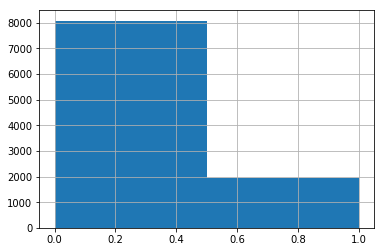

In [9]:
synthesized['type'].hist(bins=2, range=[0, 1])

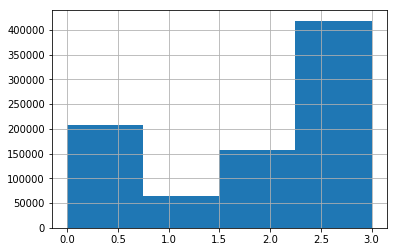

In [10]:
data['operation'].hist(bins=4, range=[0, 3])

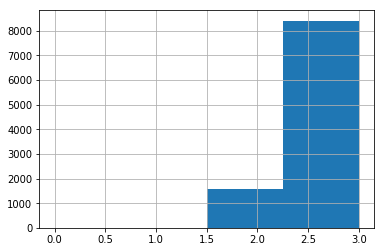

In [11]:
synthesized['operation'].hist(bins=4, range=[0, 3])

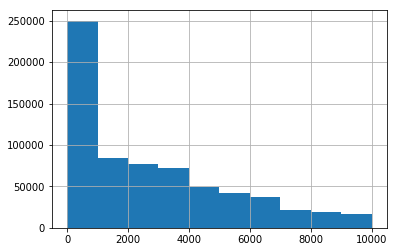

In [12]:
data['amount'].hist(bins=10, range=[0.0, 10000.0])

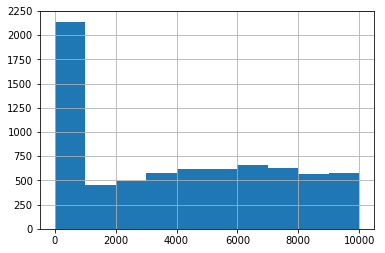

In [13]:
synthesized['amount'].hist(bins=10, range=[0.0, 10000.0])

# Tests to confirm the utility of synthetic data 

In [14]:
from synthesized.testing.testing_environment import estimate_utility
from sklearn.tree import DecisionTreeClassifier

In [15]:
estimate_utility(
    df_orig=data, df_synth=synthesized,
    continuous_columns=['amount'],  categorical_columns=['type', 'operation'],
    classifier=DecisionTreeClassifier()
)

,target_column,classifier,baseline_score,synth_score,change,utility
0,type,DecisionTreeClassifier,1.000000,0.791434,-0.208566,79.14
1,amount,DecisionTreeClassifier,0.758202,0.687592,-0.070610,90.69
2,operation,DecisionTreeClassifier,0.976312,0.518656,-0.457655,53.12
